# PROJET METHODOLOGIQUE : GRAVITE DES ACCIDENTS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score

# 1) Nettoyage et fusion des différentes tables 

In [2]:
carac = pd.read_csv("caracteristiques-2018.csv", encoding='latin-1')
carac

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201800000001,18,1,24,1505,1,1,4,1.0,1.0,5,route des Ansereuilles,M,5055737.0,294992.0,590
1,201800000002,18,2,12,1015,1,2,7,7.0,7.0,11,Place du général de Gaul,M,5052936.0,293151.0,590
2,201800000003,18,3,4,1135,1,2,3,1.0,7.0,477,Rue nationale,M,5051243.0,291714.0,590
3,201800000004,18,5,5,1735,1,2,1,7.0,3.0,52,30 rue Jules Guesde,M,5051974.0,289123.0,590
4,201800000005,18,6,26,1605,1,2,1,1.0,3.0,477,72 rue Victor Hugo,M,5051607.0,290605.0,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57778,201800057779,18,12,15,1050,1,2,1,1.0,6.0,611,passamanty-Sada ( rue de,Y,1280217.0,4521356.0,976
57779,201800057780,18,12,16,610,2,2,1,1.0,3.0,611,mamoudzou centre-Command,Y,1278120.0,4523436.0,976
57780,201800057781,18,12,22,2150,5,2,1,1.0,6.0,611,kaweni-SPPM ( rue de la,Y,1276930.0,4522409.0,976
57781,201800057782,18,12,23,1945,5,2,1,1.0,1.0,611,cavani-Kavani sud ( rue,Y,1278622.0,4522036.0,976


In [3]:
len(carac)

57783

In [4]:
lieu = pd.read_csv("lieux-2018.csv",dtype={'voie': str})
lieu.head(10)

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201800000001,3,41,NaN,C,2.0,2.0,NaN,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0
1,201800000002,4,41,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0
2,201800000003,3,39,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
3,201800000004,3,39,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
4,201800000005,4,NaN,NaN,NaN,1.0,1.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
5,201800000006,3,39,NaN,D,0.0,2.0,NaN,NaN,0.0,2.0,2.0,NaN,NaN,2.0,0.0,3.0,0.0
6,201800000007,3,41,NaN,D,2.0,2.0,16.0,500.0,0.0,1.0,1.0,NaN,NaN,1.0,0.0,3.0,0.0
7,201800000008,4,-,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
8,201800000009,3,141,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,3.0,0.0
9,201800000010,3,641,NaN,NaN,2.0,2.0,1.0,670.0,2.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0


In [5]:
len(lieu)

57783

In [6]:
vehic = pd.read_csv("vehicules-2018.csv")
vehic.head(10)

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201800000001,0.0,7,0,0.0,2.0,3.0,1.0,B01
1,201800000001,0.0,7,0,0.0,2.0,2.0,15.0,A01
2,201800000002,0.0,7,0,0.0,1.0,0.0,1.0,A01
3,201800000003,0.0,33,0,1.0,2.0,1.0,1.0,A01
4,201800000003,0.0,7,0,0.0,2.0,8.0,15.0,B01
5,201800000003,0.0,7,0,0.0,0.0,7.0,24.0,C01
6,201800000004,0.0,1,0,0.0,2.0,8.0,0.0,B01
7,201800000004,0.0,7,0,0.0,9.0,2.0,21.0,A01
8,201800000005,0.0,2,0,0.0,2.0,2.0,17.0,A01
9,201800000005,0.0,7,0,0.0,2.0,3.0,20.0,B01


In [7]:
vehic.drop_duplicates().head()
#On devrait changer ça si on veut suivre ce que nous a dit le prof, garder les doublons d'accident et recréer un identifiant 
#en combinant id de l'accident et id du véhicule dans l'accident

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201800000001,0.0,7,0,0.0,2.0,3.0,1.0,B01
1,201800000001,0.0,7,0,0.0,2.0,2.0,15.0,A01
2,201800000002,0.0,7,0,0.0,1.0,0.0,1.0,A01
3,201800000003,0.0,33,0,1.0,2.0,1.0,1.0,A01
4,201800000003,0.0,7,0,0.0,2.0,8.0,15.0,B01


In [8]:
len(vehic)

98876

In [9]:
usagers = pd.read_csv("usagers-2018.csv")
usagers.head(10)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201800000001,1.0,1,3,1,0.0,11.0,0.0,0.0,0.0,1928.0,B01
1,201800000001,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
2,201800000002,1.0,1,1,1,0.0,11.0,0.0,0.0,0.0,1947.0,A01
3,201800000002,NaN,3,4,1,0.0,2.0,2.0,3.0,1.0,1959.0,A01
4,201800000003,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,1987.0,A01
5,201800000003,1.0,1,1,1,0.0,3.0,0.0,0.0,0.0,1977.0,C01
6,201800000004,1.0,1,3,1,5.0,2.0,0.0,0.0,0.0,2013.0,B01
7,201800000004,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1982.0,A01
8,201800000005,1.0,1,4,1,5.0,21.0,0.0,0.0,0.0,2001.0,A01
9,201800000005,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1946.0,B01


In [10]:
len(usagers)

130169

# Table Caracteristiques et lieux

### On merge les 2 tables qui concernent les caractéristiques et des accidents dans leur globalité 

In [11]:
caralieu = pd.merge(carac, lieu, on = "Num_Acc", how = "left")
caralieu.head(10)

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201800000001,18,1,24,1505,1,1,4,1.0,1.0,...,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0
1,201800000002,18,2,12,1015,1,2,7,7.0,7.0,...,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0
2,201800000003,18,3,4,1135,1,2,3,1.0,7.0,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
3,201800000004,18,5,5,1735,1,2,1,7.0,3.0,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
4,201800000005,18,6,26,1605,1,2,1,1.0,3.0,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
5,201800000006,18,9,23,630,2,2,1,2.0,6.0,...,NaN,0.0,2.0,2.0,NaN,NaN,2.0,0.0,3.0,0.0
6,201800000007,18,9,26,40,5,2,1,1.0,6.0,...,500.0,0.0,1.0,1.0,NaN,NaN,1.0,0.0,3.0,0.0
7,201800000008,18,11,30,1715,5,2,1,1.0,6.0,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
8,201800000009,18,2,18,1557,1,1,1,1.0,6.0,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,3.0,0.0
9,201800000010,18,3,19,1530,1,2,2,1.0,1.0,...,670.0,2.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0


In [12]:
len(caralieu)

57783

### On remplace l'année 18 par 2018

In [13]:
caralieu.loc[caralieu['an'] == 18, 'an'] = 2018
caralieu.head()   

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201800000001,2018,1,24,1505,1,1,4,1.0,1.0,...,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0
1,201800000002,2018,2,12,1015,1,2,7,7.0,7.0,...,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0
2,201800000003,2018,3,4,1135,1,2,3,1.0,7.0,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
3,201800000004,2018,5,5,1735,1,2,1,7.0,3.0,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
4,201800000005,2018,6,26,1605,1,2,1,1.0,3.0,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0


### On met la date de l'accident dans une seule variable 

In [14]:
date = pd.to_datetime(caralieu.an*10000+caralieu.mois*100+caralieu.jour,format='%Y%m%d')
caralieu['date'] = date  #and we add it to the dataframe

In [15]:
#We delate the column### On met l'heure au bon format pour pouvoir l'utiliser ensuite  'an', 'mois', 'jour' #

caralieu = caralieu.drop(caralieu.loc[:,'an':'jour'].head(0).columns, axis=1)

### On met l'heure au bon format pour pouvoir l'utiliser ensuite 

In [16]:
caralieu['heure'] = round(caralieu['hrmn']/100,2)
caralieu['heure'] = caralieu['heure'].astype(str)
caralieu[['heure', 'minutes']] = caralieu['heure'].str.split('.', 1, expand=True)
caralieu = caralieu.drop(['hrmn','minutes'], axis = 1)

In [17]:
'''
caralieu['heure'] = round(caralieu['hrmn']/100,2)
caralieu['heure'] = caralieu['heure'].astype(str)
caralieu[['heure', 'minutes']] = caralieu['heure'].str.split('.', 1, expand=True)
caralieu['minutes'] = caralieu['minutes'] + '0'
caralieu['minutes'] = caralieu['minutes'].map(lambda x: str(x)[:2])
time = (pd.to_datetime(caralieu['heure'].astype(str) + ':' + caralieu['minutes'].astype(str), format='%H:%M')
          .dt.time)
caralieu['heure'] = time
caralieu = caralieu.drop(['hrmn','minutes'], axis = 1)
'''

"\ncaralieu['heure'] = round(caralieu['hrmn']/100,2)\ncaralieu['heure'] = caralieu['heure'].astype(str)\ncaralieu[['heure', 'minutes']] = caralieu['heure'].str.split('.', 1, expand=True)\ncaralieu['minutes'] = caralieu['minutes'] + '0'\ncaralieu['minutes'] = caralieu['minutes'].map(lambda x: str(x)[:2])\ntime = (pd.to_datetime(caralieu['heure'].astype(str) + ':' + caralieu['minutes'].astype(str), format='%H:%M')\n          .dt.time)\ncaralieu['heure'] = time\ncaralieu = caralieu.drop(['hrmn','minutes'], axis = 1)\n"

### On organise les données un peu mieux

In [18]:
#We put the column "date" and "heure" at the second and third position to have a better visualisation#
cols = caralieu.columns.tolist()
cols = cols[0:1] + cols[-2:] + cols[1:-2]
caralieu = caralieu[cols]
caralieu.head()

,Num_Acc,date,heure,lum,agg,int,atm,col,com,adr,...,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201800000001,2018-01-24,15,1,1,4,1.0,1.0,5,route des Ansereuilles,...,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0
1,201800000002,2018-02-12,10,1,2,7,7.0,7.0,11,Place du général de Gaul,...,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0
2,201800000003,2018-03-04,11,1,2,3,1.0,7.0,477,Rue nationale,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
3,201800000004,2018-05-05,17,1,2,1,7.0,3.0,52,30 rue Jules Guesde,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
4,201800000005,2018-06-26,16,1,2,1,1.0,3.0,477,72 rue Victor Hugo,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0


# Table Vehicules et Usagers

### On traite le pb des tables usagers et vehicules, i.e. certains usagers et véhicules ont le même numéro d'accident  

### tout d'abord, on supprime les colonnes dont on a pas besoin et les lignes avec des valeurs manquantes 

pour la table vehicule on peut garder sa categorie, le numero accident ID et le nombre

In [19]:
veh = vehic[['catv', 'Num_Acc','num_veh','choc', 'obsm']]
veh[veh.catv.notnull() & veh.Num_Acc.notnull()] #pas de missing values non plus
veh.shape

(98876, 5)

### Regardons les différentes catégories de veh pour faire de plus grosses catégories

In [20]:
veh.catv.value_counts()

7     60384
33     8277
10     6390
1      4967
2      3967
30     2740
31     2479
32     2002
34     1781
15      971
17      906
99      778
14      771
37      677
13      412
3       399
21      231
38      179
20      172
36      153
40      129
16       54
35       30
39       27
Name: catv, dtype: int64

On a 24 cat, on garde que quelques categories selon le poids du vehicule impliqué 

### On créer 4 categories :
### - 1 si véhicule léger  (scooter, bikes, motocycles, quads etc.)
### - 2 si vehicule léger (<3,5T)
### - 3 si vehicule lourd ( >3,5T)
### - 4 si train  ( tranway and train )

In [21]:
#For the first category
veh.catv[veh.catv == 1] = 1 
veh.catv[veh.catv == 2] = 1 
veh.catv[veh.catv == 3] = 1
veh.catv[veh.catv == 30] = 1
veh.catv[veh.catv == 31] = 1 
veh.catv[veh.catv == 32] = 1 
veh.catv[veh.catv == 33] = 1
veh.catv[veh.catv == 34] = 1
veh.catv[veh.catv == 35] = 1 
veh.catv[veh.catv == 36] = 1 
veh.catv[veh.catv == 99] = 1
#Second category
veh.catv[veh.catv == 7] = 2
veh.catv[veh.catv == 10] = 2
#Third category
veh.catv[veh.catv == 13] = 3
veh.catv[veh.catv == 14] = 3
veh.catv[veh.catv == 15] = 3
veh.catv[veh.catv == 16] = 3 
veh.catv[veh.catv == 17] = 3
veh.catv[veh.catv == 20] = 3
veh.catv[veh.catv == 21] = 3
veh.catv[veh.catv == 37] = 3
veh.catv[veh.catv == 38] = 3
#Fourth category 
veh.catv[veh.catv == 39] = 4
veh.catv[veh.catv == 40] = 4


<ipython-input-21-e43e19b346b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh.catv[veh.catv == 1] = 1
C:\Users\Station\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-21-e43e19b346b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh.catv[veh.catv == 2] = 1
C:\Users\Station\anaconda3\lib\site-packages\pandas\core\series

In [22]:
veh.catv.value_counts()

2    66774
1    27573
3     4373
4      156
Name: catv, dtype: int64

On a maintenant 4 catégories

In [23]:
veh.num_veh.value_counts()

A01    56736
B01    34577
C01     4317
Z01     1700
D01      950
E01      239
R01      108
F01       78
B02       51
G01       26
Y01       23
H01       11
T01       10
I01        9
Z02        7
X01        7
K01        6
M01        5
J01        5
F02        3
L01        3
C02        1
W01        1
A02        1
C03        1
V01        1
Name: num_veh, dtype: int64

In [24]:
len(veh)

98876

In [25]:
veh.drop_duplicates().head() #pas faire ça

,catv,Num_Acc,num_veh,choc,obsm
0,2,201800000001,B01,3.0,2.0
1,2,201800000001,A01,2.0,2.0
2,2,201800000002,A01,0.0,1.0
3,1,201800000003,A01,1.0,2.0
4,2,201800000003,B01,8.0,2.0


In [26]:
print(veh)

       catv       Num_Acc num_veh  choc  obsm
0         2  201800000001     B01   3.0   2.0
1         2  201800000001     A01   2.0   2.0
2         2  201800000002     A01   0.0   1.0
3         1  201800000003     A01   1.0   2.0
4         2  201800000003     B01   8.0   2.0
...     ...           ...     ...   ...   ...
98871     2  201800057781     A01   7.0   1.0
98872     2  201800057782     A01   1.0   2.0
98873     1  201800057782     B01   1.0   2.0
98874     2  201800057783     B01   1.0   2.0
98875     2  201800057783     A01   0.0   2.0

[98876 rows x 5 columns]


### Pour la table user on supprime tout sauf la gravité 

In [27]:
grv = usagers[['grav', 'Num_Acc', 'num_veh']] 
grv[grv.grav.notnull() & grv.Num_Acc.notnull()] #delate missing values
grv.head(10)

,grav,Num_Acc,num_veh
0,3,201800000001,B01
1,1,201800000001,A01
2,1,201800000002,A01
3,4,201800000002,A01
4,3,201800000003,A01
5,1,201800000003,C01
6,3,201800000004,B01
7,1,201800000004,A01
8,4,201800000005,A01
9,1,201800000005,B01


In [28]:
len(grv)

130169

In [29]:
# There is no missing values here, but still the pb of non unique values 

### On recode la variable "gravité" pour plus de logique 

In [30]:
gravite = []
for i in range(len(grv)):
    if grv['grav'].iloc[i] == 1:
        gravite.append(1)
    elif grv['grav'].iloc[i] == 2:
        gravite.append(4)
    elif grv['grav'].iloc[i] == 3:
        gravite.append(3)
    else:
        gravite.append(2)

In [31]:
gr = pd.DataFrame(gravite, columns = ['gravite'])
gr.head()

,gravite
0,3
1,1
2,1
3,2
4,3


In [32]:
gr = pd.concat([grv,gr], axis = 1)
gr.head()

,grav,Num_Acc,num_veh,gravite
0,3,201800000001,B01,3
1,1,201800000001,A01,1
2,1,201800000002,A01,1
3,4,201800000002,A01,2
4,3,201800000003,A01,3


In [33]:
gr = gr.drop(['grav'], axis = 1)
gr.head()

,Num_Acc,num_veh,gravite
0,201800000001,B01,3
1,201800000001,A01,1
2,201800000002,A01,1
3,201800000002,A01,2
4,201800000003,A01,3


### On garde seulement une valeur de gravité par vehicule et pour cela nous pouvons faire 2 méthodes :

### 1) La première est de prendre le max

In [34]:
grvmax =gr.groupby(['Num_Acc','num_veh'], as_index=False).agg({'gravite':'max'})
grvmax.head(10)

,Num_Acc,num_veh,gravite
0,201800000001,A01,1
1,201800000001,B01,3
2,201800000002,A01,2
3,201800000003,A01,3
4,201800000003,C01,1
5,201800000004,A01,1
6,201800000004,B01,3
7,201800000005,A01,2
8,201800000005,B01,1
9,201800000006,A01,3


### 2) La deuxieme la moyenne 

In [35]:
grvmean =gr.groupby(['Num_Acc','num_veh'], as_index=False).agg({'gravite':'mean'})
grvmean.head(10)

,Num_Acc,num_veh,gravite
0,201800000001,A01,1.00
1,201800000001,B01,3.00
2,201800000002,A01,1.50
3,201800000003,A01,3.00
4,201800000003,C01,1.00
5,201800000004,A01,1.00
6,201800000004,B01,3.00
7,201800000005,A01,2.00
8,201800000005,B01,1.00
9,201800000006,A01,1.75


With round values : 

In [36]:
grvmean.gravite = grvmean.gravite.round() 
grvmean.head(10)

,Num_Acc,num_veh,gravite
0,201800000001,A01,1.0
1,201800000001,B01,3.0
2,201800000002,A01,2.0
3,201800000003,A01,3.0
4,201800000003,C01,1.0
5,201800000004,A01,1.0
6,201800000004,B01,3.0
7,201800000005,A01,2.0
8,201800000005,B01,1.0
9,201800000006,A01,2.0


In [37]:
grvmean.describe()

,Num_Acc,gravite
count,9.704100e+04,97041.000000
mean,2.018000e+11,1.847559
std,1.673860e+04,0.753748
min,2.018000e+11,1.000000
25%,2.018000e+11,1.000000
50%,2.018000e+11,2.000000
75%,2.018000e+11,2.000000
max,2.018001e+11,4.000000


In [38]:
grvmax.describe()

,Num_Acc,gravite
count,9.704100e+04,97041.000000
mean,2.018000e+11,1.934687
std,1.673860e+04,0.820341
min,2.018000e+11,1.000000
25%,2.018000e+11,1.000000
50%,2.018000e+11,2.000000
75%,2.018000e+11,2.000000
max,2.018001e+11,4.000000


In [39]:
gr.describe()

,Num_Acc,gravite
count,1.301690e+05,130169.000000
mean,2.018000e+11,1.805676
std,1.670913e+04,0.808416
min,2.018000e+11,1.000000
25%,2.018000e+11,1.000000
50%,2.018000e+11,2.000000
75%,2.018000e+11,2.000000
max,2.018001e+11,4.000000


### On peut comparer les 2 et choisir la meilleure 

In [40]:
bar1 = gr.groupby(['gravite']).count()/len(gr)
grvmax['Num_Acc'] = grvmax.index
bar2 = grvmax.groupby(['gravite']).count()/len(grvmax)
grvmean['Num_Acc'] = grvmean.index
bar3 = grvmean.groupby(['gravite']).count()/len(grvmean)

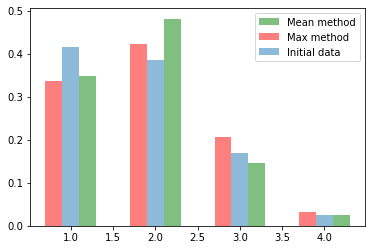

In [41]:
bar1['gravite'] = bar1.index
bar2['gravite'] = bar2.index
bar3['gravite'] = bar3.index
plt.bar(bar3['gravite'] + 0.2, bar3['Num_Acc'], width = 0.2, alpha = 0.5, color = "green", label = "Mean method",  align='center')
plt.bar(bar2['gravite']- 0.2, bar2['Num_Acc'], alpha = 0.5, width = 0.2, color = "red", label = "Max method ",  align='center')
plt.bar(bar1['gravite'], bar1['Num_Acc'], alpha = 0.5, width = 0.2, label = "Initial data",  align='center')
plt.legend()
plt.show()

### La méthode max semble la mieux 
The mean method overestimate the severity for the second category which is the bigger one so we decided to keep the max method. 

In [42]:
grvmax =gr.groupby(['Num_Acc','num_veh'], as_index=False).agg({'gravite':'max'})

In [43]:
y = grvmax # on renomme le dataframe de la variable de réponse

## On merge les tables veh et grv 

### Ici le pb est que nous avons est que la table des gravité par vehicule a moins d'obseravtion que celle des vehicules 


In [44]:
len(y)

97041

In [45]:
len(veh)

98876

### Probablement  car certains accidents n'ont pas de données sur les personnes et leurs blessures


### Gardons donc que les observations qui en ont

#### Ici on regarder quel vehicule de quel accident n'a pas de gravité répertorié

In [46]:
df1 = pd.merge(veh, y, how='outer', indicator=True)
print (df1)

       catv       Num_Acc num_veh  choc  obsm  gravite     _merge
0         2  201800000001     B01   3.0   2.0      3.0       both
1         2  201800000001     A01   2.0   2.0      1.0       both
2         2  201800000002     A01   0.0   1.0      2.0       both
3         1  201800000003     A01   1.0   2.0      3.0       both
4         2  201800000003     B01   8.0   2.0      NaN  left_only
...     ...           ...     ...   ...   ...      ...        ...
98871     2  201800057781     A01   7.0   1.0      2.0       both
98872     2  201800057782     A01   1.0   2.0      2.0       both
98873     1  201800057782     B01   1.0   2.0      2.0       both
98874     2  201800057783     B01   1.0   2.0      2.0       both
98875     2  201800057783     A01   0.0   2.0      2.0       both

[98876 rows x 7 columns]


#### Et on supprime celle qui n'en n'ont pas 

In [47]:
vehigrav = df1.query('_merge == "both"')
del vehigrav['_merge']
print(vehigrav)

       catv       Num_Acc num_veh  choc  obsm  gravite
0         2  201800000001     B01   3.0   2.0      3.0
1         2  201800000001     A01   2.0   2.0      1.0
2         2  201800000002     A01   0.0   1.0      2.0
3         1  201800000003     A01   1.0   2.0      3.0
5         2  201800000003     C01   7.0   0.0      1.0
...     ...           ...     ...   ...   ...      ...
98871     2  201800057781     A01   7.0   1.0      2.0
98872     2  201800057782     A01   1.0   2.0      2.0
98873     1  201800057782     B01   1.0   2.0      2.0
98874     2  201800057783     B01   1.0   2.0      2.0
98875     2  201800057783     A01   0.0   2.0      2.0

[97041 rows x 6 columns]


In [48]:
len(vehigrav) #We have the good dataset size

97041

## On merge les 4 tables 

In [49]:
df = pd.merge(vehigrav, caralieu, on = "Num_Acc", how = "left")
df

,catv,Num_Acc,num_veh,choc,obsm,gravite,date,heure,lum,agg,...,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,2,201800000001,B01,3.0,2.0,3.0,2018-01-24,15,1,1,...,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0
1,2,201800000001,A01,2.0,2.0,1.0,2018-01-24,15,1,1,...,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0
2,2,201800000002,A01,0.0,1.0,2.0,2018-02-12,10,1,2,...,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0
3,1,201800000003,A01,1.0,2.0,3.0,2018-03-04,11,1,2,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
4,2,201800000003,C01,7.0,0.0,1.0,2018-03-04,11,1,2,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97036,2,201800057781,A01,7.0,1.0,2.0,2018-12-22,21,5,2,...,0.0,0.0,1.0,1.0,NaN,NaN,1.0,0.0,3.0,0.0
97037,2,201800057782,A01,1.0,2.0,2.0,2018-12-23,19,5,2,...,0.0,0.0,2.0,2.0,NaN,NaN,1.0,0.0,3.0,0.0
97038,1,201800057782,B01,1.0,2.0,2.0,2018-12-23,19,5,2,...,0.0,0.0,2.0,2.0,NaN,NaN,1.0,0.0,3.0,0.0
97039,2,201800057783,B01,1.0,2.0,2.0,2018-12-28,14,1,2,...,380.0,0.0,1.0,1.0,NaN,NaN,1.0,0.0,3.0,0.0


## Regarde pour les valeurs manquantes 

In [50]:
df.isnull().sum()

catv           0
Num_Acc        0
num_veh        0
choc         112
obsm         118
gravite        0
date           0
heure          0
lum            0
agg            0
int            0
atm            8
col            4
com            0
adr          924
gps           70
lat         3145
long        3145
dep            0
catr           0
voie       34875
v1         96776
v2         92580
circ         698
nbv          884
pr         24937
pr1        25376
vosp         911
prof         760
plan         732
lartpc     75308
larrout    74609
surf         774
infra        810
situ         862
env1         801
dtype: int64

In [51]:
df = df.drop(['adr','voie','v1','v2','nbv','pr','pr1','lartpc', 'larrout', 'env1'], axis = 1)

In [52]:
df.isnull().sum()

catv          0
Num_Acc       0
num_veh       0
choc        112
obsm        118
gravite       0
date          0
heure         0
lum           0
agg           0
int           0
atm           8
col           4
com           0
gps          70
lat        3145
long       3145
dep           0
catr          0
circ        698
vosp        911
prof        760
plan        732
surf        774
infra       810
situ        862
dtype: int64

In [53]:
#Number of rows that have at least one missing value 

df.shape[0] - df.dropna().shape[0]

4449

In [54]:
df

,catv,Num_Acc,num_veh,choc,obsm,gravite,date,heure,lum,agg,...,long,dep,catr,circ,vosp,prof,plan,surf,infra,situ
0,2,201800000001,B01,3.0,2.0,3.0,2018-01-24,15,1,1,...,294992.0,590,3,2.0,0.0,1.0,3.0,1.0,0.0,1.0
1,2,201800000001,A01,2.0,2.0,1.0,2018-01-24,15,1,1,...,294992.0,590,3,2.0,0.0,1.0,3.0,1.0,0.0,1.0
2,2,201800000002,A01,0.0,1.0,2.0,2018-02-12,10,1,2,...,293151.0,590,4,2.0,0.0,1.0,2.0,1.0,0.0,1.0
3,1,201800000003,A01,1.0,2.0,3.0,2018-03-04,11,1,2,...,291714.0,590,3,2.0,0.0,1.0,1.0,1.0,0.0,1.0
4,2,201800000003,C01,7.0,0.0,1.0,2018-03-04,11,1,2,...,291714.0,590,3,2.0,0.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97036,2,201800057781,A01,7.0,1.0,2.0,2018-12-22,21,5,2,...,4522409.0,976,2,2.0,0.0,1.0,1.0,1.0,0.0,3.0
97037,2,201800057782,A01,1.0,2.0,2.0,2018-12-23,19,5,2,...,4522036.0,976,4,0.0,0.0,2.0,2.0,1.0,0.0,3.0
97038,1,201800057782,B01,1.0,2.0,2.0,2018-12-23,19,5,2,...,4522036.0,976,4,0.0,0.0,2.0,2.0,1.0,0.0,3.0
97039,2,201800057783,B01,1.0,2.0,2.0,2018-12-28,14,1,2,...,4522408.0,976,2,2.0,0.0,1.0,1.0,1.0,0.0,3.0


In [55]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df

,catv,Num_Acc,num_veh,choc,obsm,gravite,date,heure,lum,agg,...,long,dep,catr,circ,vosp,prof,plan,surf,infra,situ
0,2,201800000001,B01,3.0,2.0,3.0,2018-01-24,15,1,1,...,294992.0,590,3,2.0,0.0,1.0,3.0,1.0,0.0,1.0
1,2,201800000001,A01,2.0,2.0,1.0,2018-01-24,15,1,1,...,294992.0,590,3,2.0,0.0,1.0,3.0,1.0,0.0,1.0
2,2,201800000002,A01,0.0,1.0,2.0,2018-02-12,10,1,2,...,293151.0,590,4,2.0,0.0,1.0,2.0,1.0,0.0,1.0
3,1,201800000003,A01,1.0,2.0,3.0,2018-03-04,11,1,2,...,291714.0,590,3,2.0,0.0,1.0,1.0,1.0,0.0,1.0
4,2,201800000003,C01,7.0,0.0,1.0,2018-03-04,11,1,2,...,291714.0,590,3,2.0,0.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97036,2,201800057781,A01,7.0,1.0,2.0,2018-12-22,21,5,2,...,4522409.0,976,2,2.0,0.0,1.0,1.0,1.0,0.0,3.0
97037,2,201800057782,A01,1.0,2.0,2.0,2018-12-23,19,5,2,...,4522036.0,976,4,0.0,0.0,2.0,2.0,1.0,0.0,3.0
97038,1,201800057782,B01,1.0,2.0,2.0,2018-12-23,19,5,2,...,4522036.0,976,4,0.0,0.0,2.0,2.0,1.0,0.0,3.0
97039,2,201800057783,B01,1.0,2.0,2.0,2018-12-28,14,1,2,...,4522408.0,976,2,2.0,0.0,1.0,1.0,1.0,0.0,3.0


In [56]:
#Check if we don't have missing values anymore
df.shape[0] - df.dropna().shape[0]

0

#### indicateur de responsabilité en fonction de l'endroit de la collision : on utilise la variable choc. Choc avant, avant droit, avant gauche = 1 (responsabilité). Choc Arrière, arrière droit, arrière gauche, côté gauche, côté droit = 0 (irresponsabilité). Chocs multiples (tonneaux) = 2 (responsabilité inconnue).


In [57]:
resp = df["choc"].astype(int)
resp = pd.DataFrame(resp)
df = df.drop(["choc"], axis = 1)
df = pd.concat([df, resp], axis = 1)

In [58]:
df

,catv,Num_Acc,num_veh,obsm,gravite,date,heure,lum,agg,int,...,dep,catr,circ,vosp,prof,plan,surf,infra,situ,choc
0,2,201800000001,B01,2.0,3.0,2018-01-24,15,1,1,4,...,590,3,2.0,0.0,1.0,3.0,1.0,0.0,1.0,3
1,2,201800000001,A01,2.0,1.0,2018-01-24,15,1,1,4,...,590,3,2.0,0.0,1.0,3.0,1.0,0.0,1.0,2
2,2,201800000002,A01,1.0,2.0,2018-02-12,10,1,2,7,...,590,4,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0
3,1,201800000003,A01,2.0,3.0,2018-03-04,11,1,2,3,...,590,3,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1
4,2,201800000003,C01,0.0,1.0,2018-03-04,11,1,2,3,...,590,3,2.0,0.0,1.0,1.0,1.0,0.0,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97036,2,201800057781,A01,1.0,2.0,2018-12-22,21,5,2,1,...,976,2,2.0,0.0,1.0,1.0,1.0,0.0,3.0,7
97037,2,201800057782,A01,2.0,2.0,2018-12-23,19,5,2,1,...,976,4,0.0,0.0,2.0,2.0,1.0,0.0,3.0,1
97038,1,201800057782,B01,2.0,2.0,2018-12-23,19,5,2,1,...,976,4,0.0,0.0,2.0,2.0,1.0,0.0,3.0,1
97039,2,201800057783,B01,2.0,2.0,2018-12-28,14,1,2,1,...,976,2,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1


In [59]:
df.choc[df.choc == 2] = 1
df.choc[df.choc == 3] = 1
df.choc[df.choc == 4] = 0
df.choc[df.choc == 5] = 0
df.choc[df.choc == 6] = 0
df.choc[df.choc == 7] = 0
df.choc[df.choc == 8] = 0
df.choc[df.choc == 9] = 2

<ipython-input-59-4ca7d186452f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.choc[df.choc == 2] = 1
<ipython-input-59-4ca7d186452f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.choc[df.choc == 3] = 1
<ipython-input-59-4ca7d186452f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.choc[df.choc == 4] = 0
<ipython-input-59-4ca7d186452f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [60]:
df

,catv,Num_Acc,num_veh,obsm,gravite,date,heure,lum,agg,int,...,dep,catr,circ,vosp,prof,plan,surf,infra,situ,choc
0,2,201800000001,B01,2.0,3.0,2018-01-24,15,1,1,4,...,590,3,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1
1,2,201800000001,A01,2.0,1.0,2018-01-24,15,1,1,4,...,590,3,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1
2,2,201800000002,A01,1.0,2.0,2018-02-12,10,1,2,7,...,590,4,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0
3,1,201800000003,A01,2.0,3.0,2018-03-04,11,1,2,3,...,590,3,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1
4,2,201800000003,C01,0.0,1.0,2018-03-04,11,1,2,3,...,590,3,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97036,2,201800057781,A01,1.0,2.0,2018-12-22,21,5,2,1,...,976,2,2.0,0.0,1.0,1.0,1.0,0.0,3.0,0
97037,2,201800057782,A01,2.0,2.0,2018-12-23,19,5,2,1,...,976,4,0.0,0.0,2.0,2.0,1.0,0.0,3.0,1
97038,1,201800057782,B01,2.0,2.0,2018-12-23,19,5,2,1,...,976,4,0.0,0.0,2.0,2.0,1.0,0.0,3.0,1
97039,2,201800057783,B01,2.0,2.0,2018-12-28,14,1,2,1,...,976,2,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1


# 2) Statistiques descriptives 

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92592 entries, 0 to 97040
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   catv     92592 non-null  int64         
 1   Num_Acc  92592 non-null  int64         
 2   num_veh  92592 non-null  object        
 3   obsm     92592 non-null  float64       
 4   gravite  92592 non-null  float64       
 5   date     92592 non-null  datetime64[ns]
 6   heure    92592 non-null  object        
 7   lum      92592 non-null  int64         
 8   agg      92592 non-null  int64         
 9   int      92592 non-null  int64         
 10  atm      92592 non-null  float64       
 11  col      92592 non-null  float64       
 12  com      92592 non-null  int64         
 13  gps      92592 non-null  object        
 14  lat      92592 non-null  float64       
 15  long     92592 non-null  float64       
 16  dep      92592 non-null  int64         
 17  catr     92592 non-null  int64 

<AxesSubplot:>

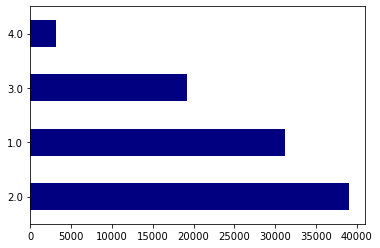

In [62]:
df['gravite'].value_counts()[:4].plot(kind='barh', color='navy') #part inégale entre les différentes catégories.. on SMOTE ?

<AxesSubplot:ylabel='Num_Acc'>

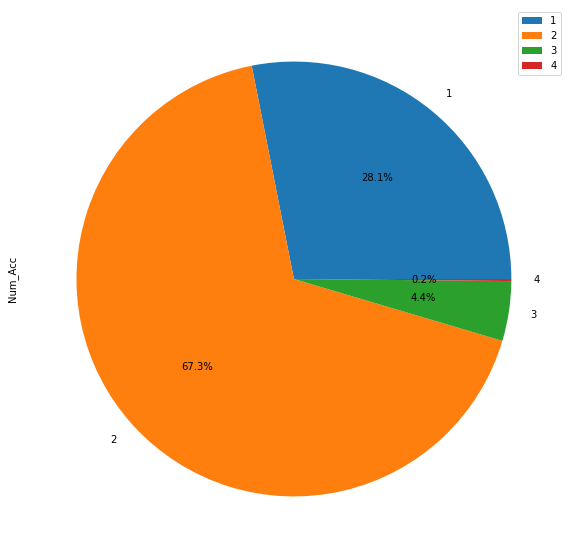

In [63]:
catv_count = df.groupby(['catv']).count()
dfcatv = pd.DataFrame(catv_count["Num_Acc"])
dfcatv.plot.pie(y='Num_Acc', figsize=(10,10), autopct='%1.1f%%')

<AxesSubplot:ylabel='catv'>

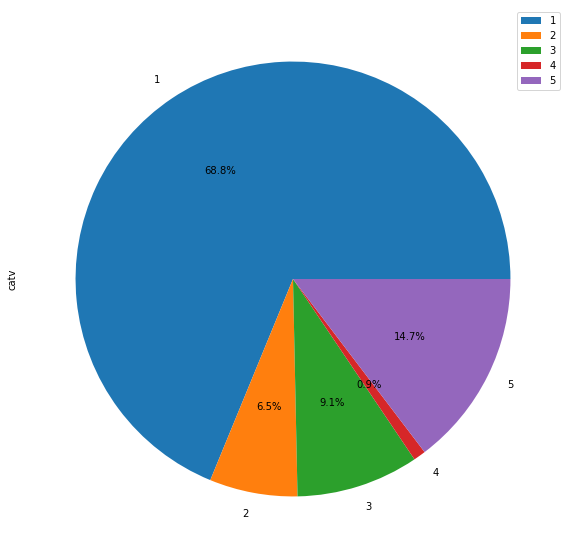

In [64]:
lum_count = df.groupby(['lum']).count()
dflum = pd.DataFrame(lum_count["catv"])
dflum.plot.pie(y='catv', figsize=(10,10), autopct='%1.1f%%')

In [65]:
int_count = df.groupby(["int"]).count()
int_count

,catv,Num_Acc,num_veh,obsm,gravite,date,heure,lum,agg,atm,...,dep,catr,circ,vosp,prof,plan,surf,infra,situ,choc
int,,,,,,,,,,,,,,,,,,,,,
1,60730,60730,60730,60730,60730,60730,60730,60730,60730,60730,...,60730,60730,60730,60730,60730,60730,60730,60730,60730,60730
2,11780,11780,11780,11780,11780,11780,11780,11780,11780,11780,...,11780,11780,11780,11780,11780,11780,11780,11780,11780,11780
3,9717,9717,9717,9717,9717,9717,9717,9717,9717,9717,...,9717,9717,9717,9717,9717,9717,9717,9717,9717,9717
4,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830,...,1830,1830,1830,1830,1830,1830,1830,1830,1830,1830
5,425,425,425,425,425,425,425,425,425,425,...,425,425,425,425,425,425,425,425,425,425
6,3347,3347,3347,3347,3347,3347,3347,3347,3347,3347,...,3347,3347,3347,3347,3347,3347,3347,3347,3347,3347
7,1011,1011,1011,1011,1011,1011,1011,1011,1011,1011,...,1011,1011,1011,1011,1011,1011,1011,1011,1011,1011
8,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,98,98,98
9,3654,3654,3654,3654,3654,3654,3654,3654,3654,3654,...,3654,3654,3654,3654,3654,3654,3654,3654,3654,3654


In [66]:
dfint = pd.DataFrame(int_count["catv"])

<AxesSubplot:ylabel='catv'>

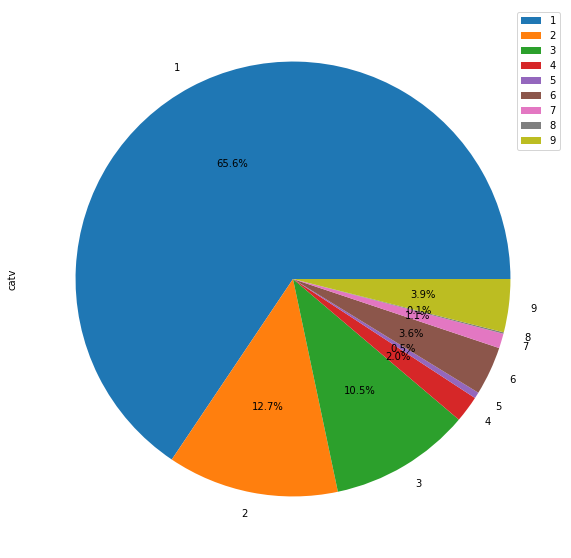

In [67]:
dfint.plot.pie(y='catv', figsize=(10,10), autopct='%1.1f%%')

<AxesSubplot:ylabel='catv'>

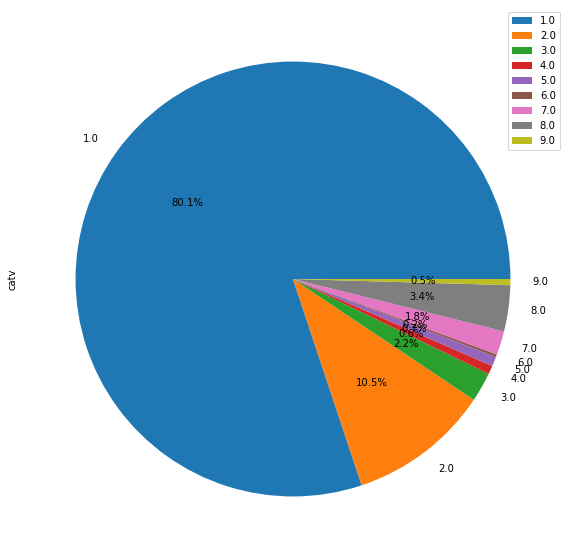

In [68]:
atm_count = df.groupby(['atm']).count()
dfatm = pd.DataFrame(atm_count["catv"])
dfatm.plot.pie(y='catv', figsize=(10,10), autopct='%1.1f%%')

<AxesSubplot:ylabel='catv'>

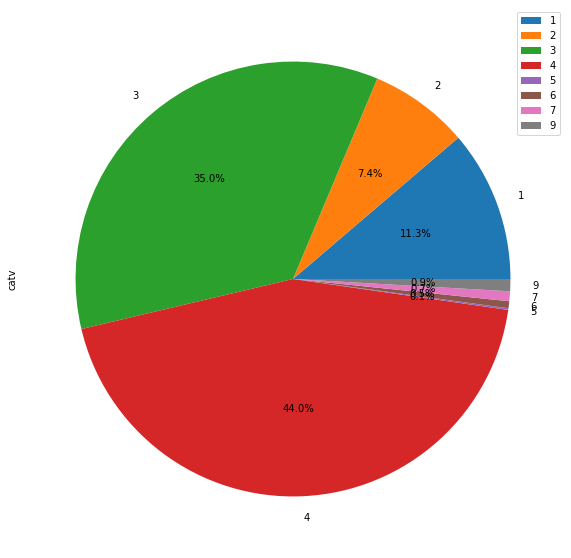

In [69]:
catr_count = df.groupby(['catr']).count()
dfcatr = pd.DataFrame(catr_count["catv"])
dfcatr.plot.pie(y='catv', figsize=(10,10), autopct='%1.1f%%')

<AxesSubplot:ylabel='catv'>

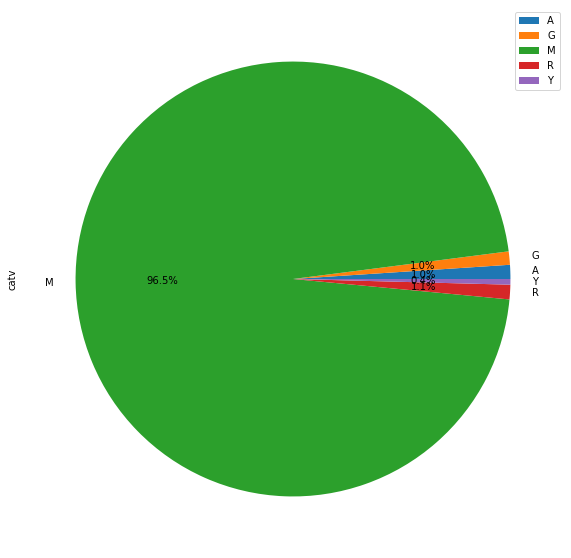

In [70]:
gps_count = df.groupby(['gps']).count()
dfgps = pd.DataFrame(gps_count["catv"])
dfgps.plot.pie(y='catv', figsize=(10,10), autopct='%1.1f%%')

In [71]:
circ_count = df.groupby(["circ"]).count()

<AxesSubplot:ylabel='catv'>

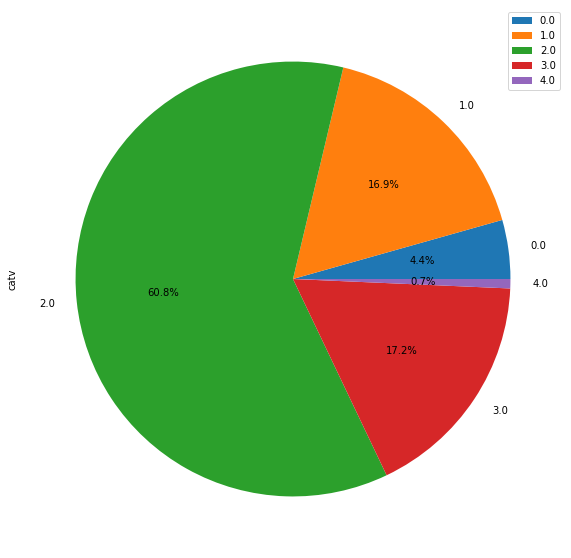

In [72]:
dfcirc = pd.DataFrame(circ_count["catv"])
dfcirc.plot.pie(y='catv', figsize=(10,10), autopct='%1.1f%%')
#catégorie 0 non définie, supposons que c'est "autre"

<AxesSubplot:ylabel='catv'>

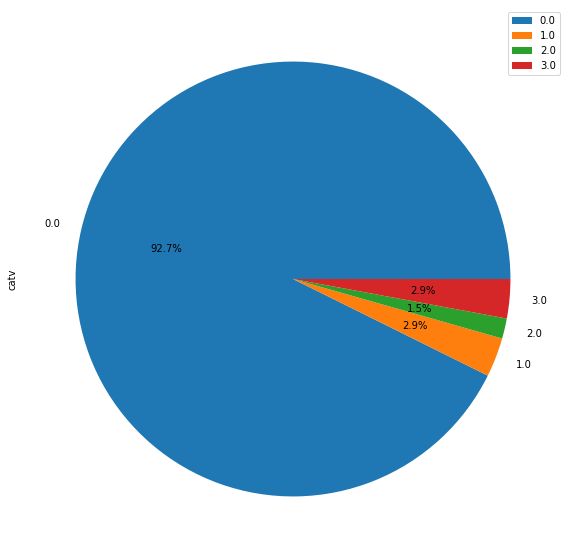

In [73]:
vosp_count = df.groupby(['vosp']).count()
dfvosp = pd.DataFrame(vosp_count["catv"])
dfvosp.plot.pie(y='catv', figsize=(10,10), autopct='%1.1f%%')
#catégorie 0 : pas de voie réservée

<AxesSubplot:ylabel='catv'>

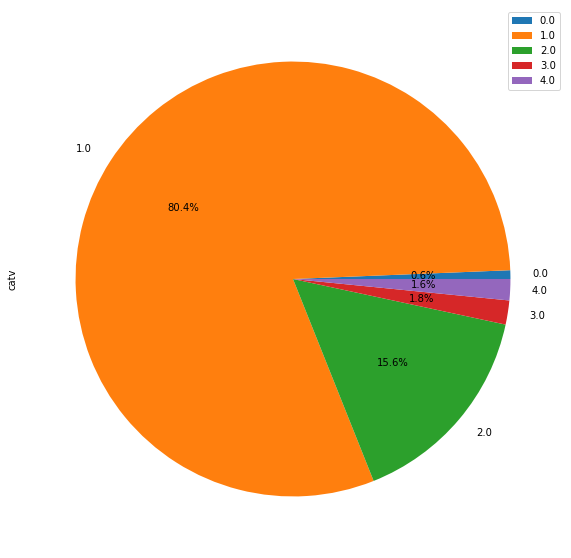

In [74]:
prof_count = df.groupby(['prof']).count()
dfprof = pd.DataFrame(prof_count["catv"])
dfprof.plot.pie(y='catv', figsize=(10,10), autopct='%1.1f%%')
#catégorie 0 non expliquée dans le descriptif, disons que c'est "autre"

<AxesSubplot:ylabel='catv'>

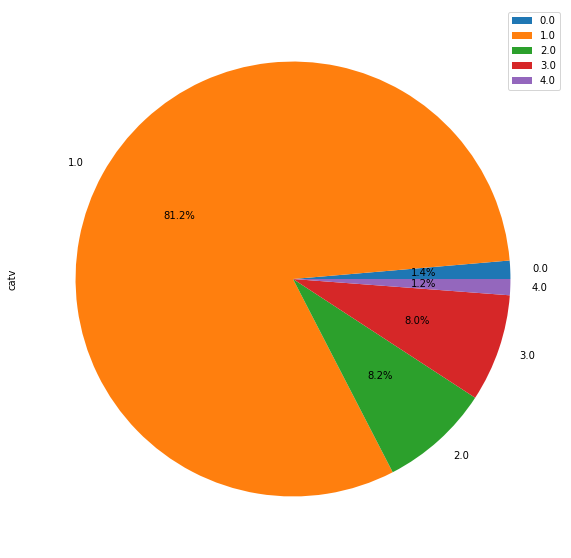

In [75]:
plan_count = df.groupby(['plan']).count()
dfplan = pd.DataFrame(plan_count["catv"])
dfplan.plot.pie(y='catv', figsize=(10,10), autopct='%1.1f%%')
#catégorie 0 non expliquée dans le descriptif, disons que c'est "autre"

<AxesSubplot:ylabel='catv'>

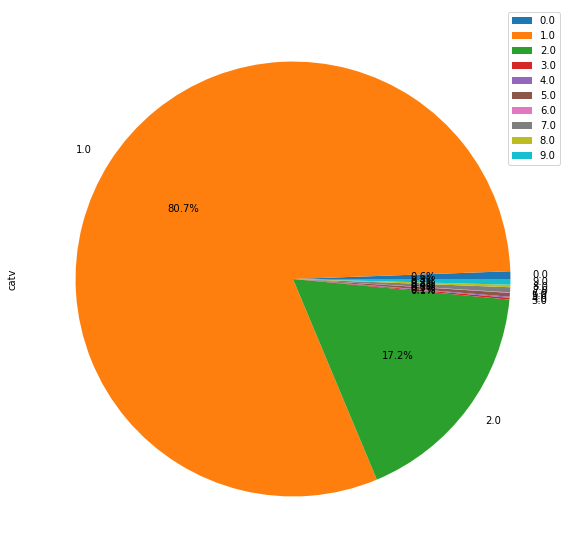

In [76]:
surf_count = df.groupby(['surf']).count()
dfsurf = pd.DataFrame(surf_count["catv"])
dfsurf.plot.pie(y='catv', figsize=(10,10), autopct='%1.1f%%')
#catégorie 0 non expliquée dans le descriptive, et catégorie "autre" déjà existante,
#on transforme les valeurs 0 en 9 

In [77]:
df.surf[df.surf == 0.0] = 9.0

<ipython-input-77-6e4974fbab98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.surf[df.surf == 0.0] = 9.0


<AxesSubplot:ylabel='catv'>

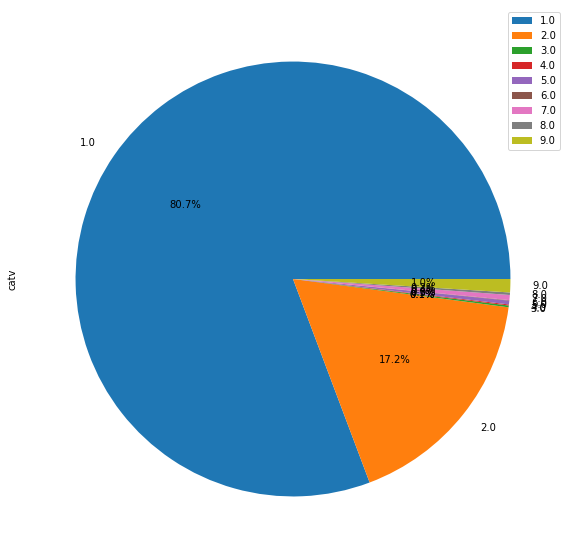

In [78]:
surf_count = df.groupby(['surf']).count()
dfsurf = pd.DataFrame(surf_count["catv"])
dfsurf.plot.pie(y='catv', figsize=(10,10), autopct='%1.1f%%')

<AxesSubplot:ylabel='catv'>

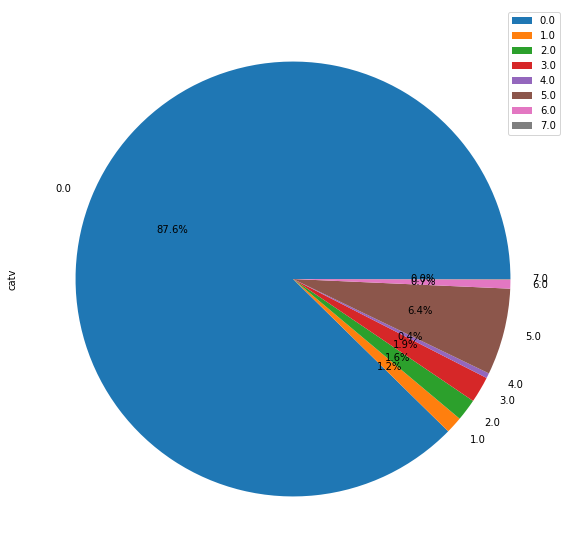

In [79]:
infra_count = df.groupby(['infra']).count()
dfinfra = pd.DataFrame(infra_count["catv"])
dfinfra.plot.pie(y='catv', figsize=(10,10), autopct='%1.1f%%')
#catégorie 0 non décrite, par déduction, catégorie "pas d'aménagement particulier"

<AxesSubplot:ylabel='catv'>

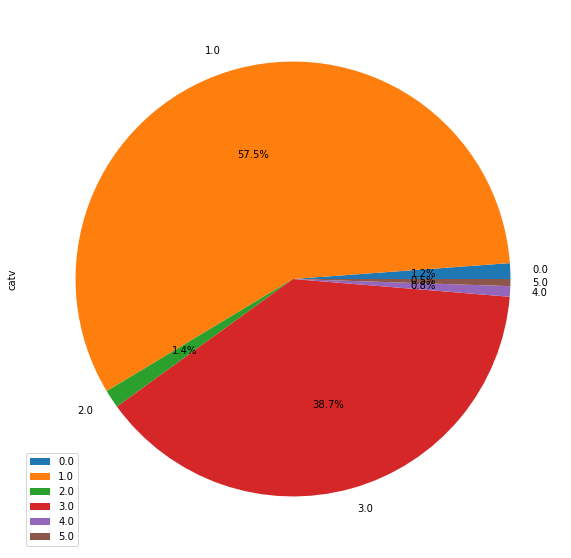

In [80]:
situ_count = df.groupby(['situ']).count()
dfsitu = pd.DataFrame(situ_count["catv"])
dfsitu.plot.pie(y='catv', figsize=(10,10), autopct='%1.1f%%')
#catégorie 0 non décrite, nous supposons que c'est "autre"

## Graphiques : affichage du nombre d'accident et de la gravité moyenne par 1) Jour et 2) Semaine

### 1) Par jour : on regroupe les accidents par jour (365 jours) en faisant la moyenne, puis on regroupe par jour de la semaine (Lundi, Mardi, ...) en prenant la moyenne de la moyenne de la gravité.

In [81]:
freq = df.groupby(["date"]).count()
freq

,catv,Num_Acc,num_veh,obsm,gravite,heure,lum,agg,int,atm,...,dep,catr,circ,vosp,prof,plan,surf,infra,situ,choc
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
2018-01-02,170,170,170,170,170,170,170,170,170,170,...,170,170,170,170,170,170,170,170,170,170
2018-01-03,155,155,155,155,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
2018-01-04,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
2018-01-05,243,243,243,243,243,243,243,243,243,243,...,243,243,243,243,243,243,243,243,243,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,157,157,157,157,157,157,157,157,157,157,...,157,157,157,157,157,157,157,157,157,157
2018-12-28,170,170,170,170,170,170,170,170,170,170,...,170,170,170,170,170,170,170,170,170,170
2018-12-29,166,166,166,166,166,166,166,166,166,166,...,166,166,166,166,166,166,166,166,166,166


In [82]:
gravdate = df.groupby(["date"])["gravite"].mean()
gravdate = pd.DataFrame(gravdate)
gravdate

,gravite
date,
2018-01-01,2.187500
2018-01-02,2.000000
2018-01-03,1.935484
2018-01-04,2.076923
2018-01-05,1.913580
...,...
2018-12-27,2.133758
2018-12-28,2.000000
2018-12-29,1.927711


In [83]:
dfs = []
for i in range(52):
    dfs.append(freq[7*(i-1):7*i])
dfs.append(freq[357:364])
dfs.append(freq[364:365])

In [84]:
dfs[52].iloc[0][1]

161

In [85]:
dfs

[Empty DataFrame
 Columns: [catv, Num_Acc, num_veh, obsm, gravite, heure, lum, agg, int, atm, col, com, gps, lat, long, dep, catr, circ, vosp, prof, plan, surf, infra, situ, choc]
 Index: []
 
 [0 rows x 25 columns],
             catv  Num_Acc  num_veh  obsm  gravite  heure  lum  agg  int  atm  \
 date                                                                           
 2018-01-01   144      144      144   144      144    144  144  144  144  144   
 2018-01-02   170      170      170   170      170    170  170  170  170  170   
 2018-01-03   155      155      155   155      155    155  155  155  155  155   
 2018-01-04   156      156      156   156      156    156  156  156  156  156   
 2018-01-05   243      243      243   243      243    243  243  243  243  243   
 2018-01-06   157      157      157   157      157    157  157  157  157  157   
 2018-01-07   138      138      138   138      138    138  138  138  138  138   
 
             ...  dep  catr  circ  vosp  prof  plan 

In [86]:
lundi = []
mardi = []
mercredi = []
jeudi = []
vendredi = []
samedi = []
dimanche = []
for i in range(1,52):
        lundi.append(dfs[i].iloc[0][1])
        mardi.append(dfs[i].iloc[1][1])
        mercredi.append(dfs[i].iloc[2][1])
        jeudi.append(dfs[i].iloc[3][1])
        vendredi.append(dfs[i].iloc[4][1])
        samedi.append(dfs[i].iloc[5][1])
        dimanche.append(dfs[i].iloc[6][1])
        

In [87]:
lundi.append(dfs[53].iloc[0][1])

In [88]:
lundi = pd.DataFrame(lundi)
lundi = lundi.sum()
lundi

0    12249
dtype: int64

In [89]:
mardi = pd.DataFrame(mardi)
mardi = mardi.sum()
mardi

0    13560
dtype: int64

In [90]:
mercredi = pd.DataFrame(mercredi)
mercredi = mercredi.sum()
mercredi

0    13208
dtype: int64

In [91]:
jeudi = pd.DataFrame(jeudi)
jeudi = jeudi.sum()
jeudi

0    13669
dtype: int64

In [92]:
vendredi = pd.DataFrame(vendredi)
vendredi = vendredi.sum()
vendredi

0    16025
dtype: int64

In [93]:
samedi = pd.DataFrame(samedi)
samedi = samedi.sum()
samedi

0    12634
dtype: int64

In [94]:
dimanche = pd.DataFrame(dimanche)
dimanche = dimanche.sum()
dimanche

0    10170
dtype: int64

In [95]:
semaine = pd.concat([lundi, mardi, mercredi, jeudi, vendredi, samedi, dimanche], axis = 0)

In [96]:
semaine = pd.DataFrame(semaine)
semaine.reset_index()
semaine

,0
0,12249
0,13560
0,13208
0,13669
0,16025
0,12634
0,10170


In [97]:
jours = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]
semaines = semaine.rename(columns = {0:"Occurence"})

In [98]:
semaines = semaines.reset_index()

In [99]:
semaines = semaines.drop(["index"], axis = 1)

In [100]:
semaines

,Occurence
0,12249
1,13560
2,13208
3,13669
4,16025
5,12634
6,10170


In [101]:
dfg = []
for i in range(52):
    dfg.append(gravdate[7*(i-1):7*i])
dfg.append(gravdate[357:364])
dfg.append(gravdate[364:365])

In [102]:
dfg

[Empty DataFrame
 Columns: [gravite]
 Index: [],
              gravite
 date                
 2018-01-01  2.187500
 2018-01-02  2.000000
 2018-01-03  1.935484
 2018-01-04  2.076923
 2018-01-05  1.913580
 2018-01-06  2.012739
 2018-01-07  2.094203,
              gravite
 date                
 2018-01-08  1.939535
 2018-01-09  1.982301
 2018-01-10  1.963855
 2018-01-11  1.951049
 2018-01-12  1.901754
 2018-01-13  2.051887
 2018-01-14  2.231250,
              gravite
 date                
 2018-01-15  1.850829
 2018-01-16  1.931034
 2018-01-17  1.935897
 2018-01-18  2.028689
 2018-01-19  1.946309
 2018-01-20  2.008929
 2018-01-21  2.041096,
              gravite
 date                
 2018-01-22  1.919028
 2018-01-23  1.994975
 2018-01-24  1.938182
 2018-01-25  1.917323
 2018-01-26  1.928105
 2018-01-27  2.068783
 2018-01-28  2.034483,
              gravite
 date                
 2018-01-29  1.894977
 2018-01-30  1.890756
 2018-01-31  1.889401
 2018-02-01  1.891089
 2018-02-02  1.935849
 

In [103]:
lundig = []
mardig = []
mercredig = []
jeudig = []
vendredig = []
samedig = []
dimancheg = []
for i in range(1,52):
        lundig.append(dfg[i].iloc[0][0])
        mardig.append(dfg[i].iloc[1][0])
        mercredig.append(dfg[i].iloc[2][0])
        jeudig.append(dfg[i].iloc[3][0])
        vendredig.append(dfg[i].iloc[4][0])
        samedig.append(dfg[i].iloc[5][0])
        dimancheg.append(dfg[i].iloc[6][0])

In [104]:
lundig.append(dfg[53].iloc[0][0])

In [105]:
lundig = pd.DataFrame(lundig)
lundig = lundig.mean()
lundig

0    1.926136
dtype: float64

In [106]:
mardig = pd.DataFrame(mardig)
mardig = mardig.mean()
mardig

0    1.902059
dtype: float64

In [107]:
mercredig = pd.DataFrame(mercredig)
mercredig = mercredig.mean()
mercredig

0    1.904335
dtype: float64

In [108]:
jeudig = pd.DataFrame(jeudig)
jeudig = jeudig.mean()
jeudig

0    1.914861
dtype: float64

In [109]:
vendredig = pd.DataFrame(vendredig)
vendredig = vendredig.mean()
vendredig

0    1.914121
dtype: float64

In [110]:
samedig = pd.DataFrame(samedig)
samedig = samedig.mean()
samedig

0    2.004094
dtype: float64

In [111]:
dimancheg = pd.DataFrame(dimancheg)
dimancheg = dimancheg.mean()
dimancheg

0    2.079063
dtype: float64

In [112]:
semaineg = pd.concat([lundig, mardig, mercredig, jeudig, vendredig, samedig, dimancheg], axis = 0)
semaineg = pd.DataFrame(semaineg)
semaineg = semaineg.rename(columns = {0:"Moy_grav"})
semaineg = semaineg.reset_index()
semaineg = semaineg.drop(["index"], axis = 1)

In [113]:
sem_grav_count = pd.concat([semaines, semaineg], axis = 1)
sem_grav_count

,Occurence,Moy_grav
0,12249,1.926136
1,13560,1.902059
2,13208,1.904335
3,13669,1.914861
4,16025,1.914121
5,12634,2.004094
6,10170,2.079063


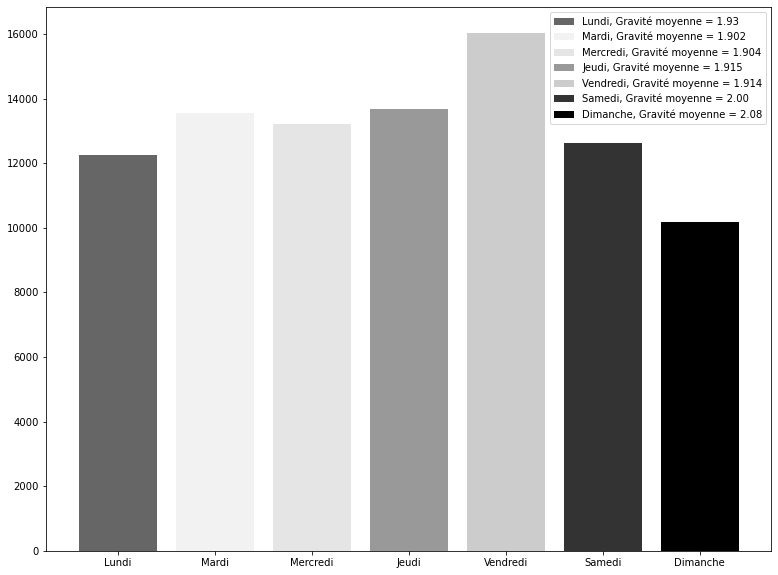

In [114]:
plt.figure(figsize = (13,10))
plt.bar(semaines.index.values, semaines["Occurence"], tick_label = jours, alpha = 0)

mask1 = sem_grav_count["Moy_grav"] == sem_grav_count["Moy_grav"].iloc[0]
mask2 = sem_grav_count["Moy_grav"] == sem_grav_count["Moy_grav"].iloc[1]
mask3 = sem_grav_count["Moy_grav"] == sem_grav_count["Moy_grav"].iloc[2]
mask4 = sem_grav_count["Moy_grav"] == sem_grav_count["Moy_grav"].iloc[3]
mask5 = sem_grav_count["Moy_grav"] == sem_grav_count["Moy_grav"].iloc[4]
mask6 = sem_grav_count["Moy_grav"] == sem_grav_count["Moy_grav"].iloc[5]
mask7 = sem_grav_count["Moy_grav"] == sem_grav_count["Moy_grav"].iloc[6]

plt.bar(semaines.index.values[mask1], semaines["Occurence"][mask1], color = 'black', alpha = 0.60, label = "Lundi, Gravité moyenne = 1.93")
plt.bar(semaines.index.values[mask2], semaines["Occurence"][mask2], color = 'black', alpha = 0.05, label = "Mardi, Gravité moyenne = 1.902")
plt.bar(semaines.index.values[mask3], semaines["Occurence"][mask3], color = 'black', alpha = 0.10, label = "Mercredi, Gravité moyenne = 1.904")
plt.bar(semaines.index.values[mask4], semaines["Occurence"][mask4], color = 'black', alpha = 0.40, label = "Jeudi, Gravité moyenne = 1.915")
plt.bar(semaines.index.values[mask5], semaines["Occurence"][mask5], color = 'black', alpha = 0.20, label = "Vendredi, Gravité moyenne = 1.914")
plt.bar(semaines.index.values[mask6], semaines["Occurence"][mask6], color = 'black', alpha = 0.80, label = "Samedi, Gravité moyenne = 2.00")
plt.bar(semaines.index.values[mask7], semaines["Occurence"][mask7], color = 'black', label = "Dimanche, Gravité moyenne = 2.08")
plt.legend()
plt.show()

### 2) Par mois : on regroupe les accidents par jour (365 jours) en faisant la moyenne, puis on regroupe par mois en prenant le maximum de la moyenne de la gravité.

In [115]:
mois = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]

In [116]:
freqt = freq.reset_index()
freqt = freqt.groupby(freqt['date'].dt.strftime('%B'))['catv'].sum().sort_values()
freqt

date
February     5468
March        6674
January      6702
August       6885
December     7214
November     7675
April        7939
May          8236
July         8495
September    8902
October      9157
June         9245
Name: catv, dtype: int64

In [117]:
freqt = pd.DataFrame(freqt)
freqt = freqt.reset_index()
freqt.date[freqt.date == "February"] = 2
freqt.date[freqt.date == "March"] = 3
freqt.date[freqt.date == "January"] = 1
freqt.date[freqt.date == "August"] = 8
freqt.date[freqt.date == "December"] = 12
freqt.date[freqt.date == "November"] = 11
freqt.date[freqt.date == "April"] = 4
freqt.date[freqt.date == "May"] = 5
freqt.date[freqt.date == "July"] = 6
freqt.date[freqt.date == "September"] = 9
freqt.date[freqt.date == "October"] = 10
freqt.date[freqt.date == "June"] = 7

<ipython-input-117-d024d1c41811>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freqt.date[freqt.date == "February"] = 2
<ipython-input-117-d024d1c41811>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freqt.date[freqt.date == "March"] = 3
<ipython-input-117-d024d1c41811>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freqt.date[freqt.date == "January"] = 1
<ipython-input-117-d024d1c41811>:6: SettingWithCopyWarning: 
A value is tr

In [118]:
freqt = freqt.sort_values(by='date', ascending = True)
freqt = freqt.set_index('date')
freqt

,catv
date,
1,6702
2,5468
3,6674
4,7939
5,8236
6,8495
7,9245
8,6885
9,8902


In [119]:
gravdate = gravdate.reset_index()
gravmois = gravdate.groupby(gravdate["date"].dt.strftime('%B'))['gravite'].mean().sort_values()

In [120]:
gravmois = pd.DataFrame(gravmois)
gravmois = gravmois.reset_index()
gravmois.date[gravmois.date == "February"] = 2
gravmois.date[gravmois.date == "March"] = 3
gravmois.date[gravmois.date == "January"] = 1
gravmois.date[gravmois.date == "August"] = 8
gravmois.date[gravmois.date == "December"] = 12
gravmois.date[gravmois.date == "November"] = 11
gravmois.date[gravmois.date == "April"] = 4
gravmois.date[gravmois.date == "May"] = 5
gravmois.date[gravmois.date == "July"] = 6
gravmois.date[gravmois.date == "September"] = 9
gravmois.date[gravmois.date == "October"] = 10
gravmois.date[gravmois.date == "June"] = 7
gravmois = gravmois.sort_values(by='date', ascending = True)
gravmois = gravmois.set_index('date')
gravmois

<ipython-input-120-adbde0508fca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gravmois.date[gravmois.date == "February"] = 2
<ipython-input-120-adbde0508fca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gravmois.date[gravmois.date == "March"] = 3
<ipython-input-120-adbde0508fca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gravmois.date[gravmois.date == "January"] = 1
<ipython-input-120-adbde0508fca>:6: SettingWithCopyWarni

,gravite
date,
1,1.982608
2,1.996033
3,1.951419
4,1.942595
5,1.947960
6,1.972877
7,1.917242
8,1.967925
9,1.928855


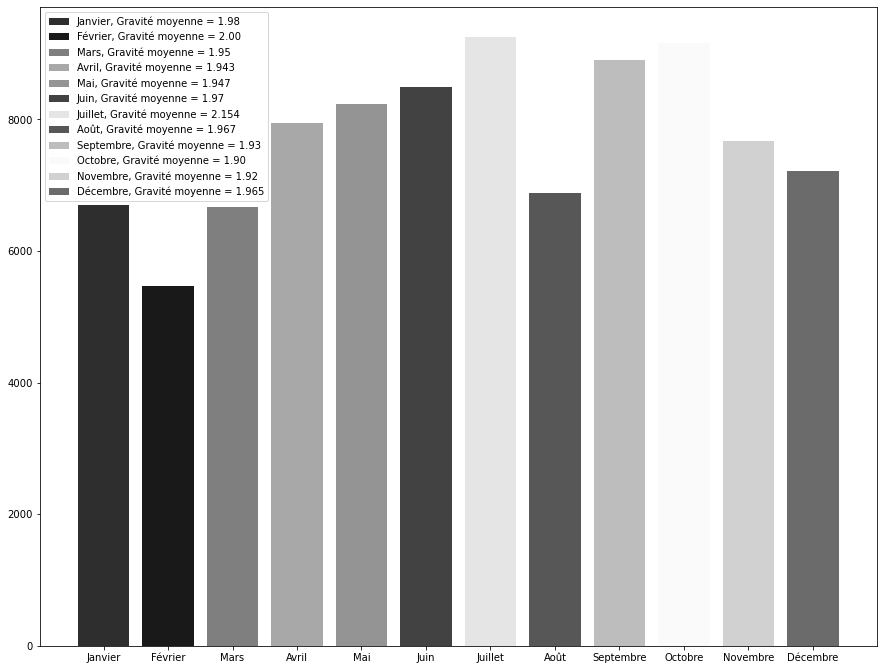

In [121]:
plt.figure(figsize = (15,11.75))
plt.bar(freqt.index.values, freqt["catv"], tick_label = mois, alpha = 0)

mask1 = gravmois["gravite"] == gravmois["gravite"].iloc[0]
mask2 = gravmois["gravite"] == gravmois["gravite"].iloc[1]
mask3 = gravmois["gravite"] == gravmois["gravite"].iloc[2]
mask4 = gravmois["gravite"] == gravmois["gravite"].iloc[3]
mask5 = gravmois["gravite"] == gravmois["gravite"].iloc[4]
mask6 = gravmois["gravite"] == gravmois["gravite"].iloc[5]
mask7 = gravmois["gravite"] == gravmois["gravite"].iloc[6]
mask8 = gravmois["gravite"] == gravmois["gravite"].iloc[7]
mask9 = gravmois["gravite"] == gravmois["gravite"].iloc[8]
mask10 = gravmois["gravite"] == gravmois["gravite"].iloc[9]
mask11 = gravmois["gravite"] == gravmois["gravite"].iloc[10]
mask12 = gravmois["gravite"] == gravmois["gravite"].iloc[11]

plt.bar(freqt.index.values[mask1], freqt["catv"][mask1], color = 'black', alpha = 0.82, label = "Janvier, Gravité moyenne = 1.98")
plt.bar(freqt.index.values[mask2], freqt["catv"][mask2], color = 'black', alpha = 0.9, label = "Février, Gravité moyenne = 2.00")
plt.bar(freqt.index.values[mask3], freqt["catv"][mask3], color = 'black', alpha = 0.50, label = "Mars, Gravité moyenne = 1.95")
plt.bar(freqt.index.values[mask4], freqt["catv"][mask4], color = 'black', alpha = 0.34, label = "Avril, Gravité moyenne = 1.943")
plt.bar(freqt.index.values[mask5], freqt["catv"][mask5], color = 'black', alpha = 0.42, label = "Mai, Gravité moyenne = 1.947")
plt.bar(freqt.index.values[mask6], freqt["catv"][mask6], color = 'black', alpha = 0.74, label = "Juin, Gravité moyenne = 1.97")
plt.bar(freqt.index.values[mask7], freqt["catv"][mask7], color = 'black', alpha = 0.10, label = "Juillet, Gravité moyenne = 2.154")
plt.bar(freqt.index.values[mask8], freqt["catv"][mask8], color = 'black', alpha = 0.66, label = "Août, Gravité moyenne = 1.967")
plt.bar(freqt.index.values[mask9], freqt["catv"][mask9], color = 'black', alpha = 0.26, label = "Septembre, Gravité moyenne = 1.93")
plt.bar(freqt.index.values[mask10], freqt["catv"][mask10], color = 'black', alpha = 0.02, label = "Octobre, Gravité moyenne = 1.90")
plt.bar(freqt.index.values[mask11], freqt["catv"][mask11], color = 'black', alpha = 0.18, label = "Novembre, Gravité moyenne = 1.92")
plt.bar(freqt.index.values[mask12], freqt["catv"][mask12], color = 'black', alpha = 0.58, label = "Décembre, Gravité moyenne = 1.965")
plt.legend()
plt.show()

# 3) Application du modèle

### Recodage des variables discrètes

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92592 entries, 0 to 97040
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   catv     92592 non-null  int64         
 1   Num_Acc  92592 non-null  int64         
 2   num_veh  92592 non-null  object        
 3   obsm     92592 non-null  float64       
 4   gravite  92592 non-null  float64       
 5   date     92592 non-null  datetime64[ns]
 6   heure    92592 non-null  object        
 7   lum      92592 non-null  int64         
 8   agg      92592 non-null  int64         
 9   int      92592 non-null  int64         
 10  atm      92592 non-null  float64       
 11  col      92592 non-null  float64       
 12  com      92592 non-null  int64         
 13  gps      92592 non-null  object        
 14  lat      92592 non-null  float64       
 15  long     92592 non-null  float64       
 16  dep      92592 non-null  int64         
 17  catr     92592 non-null  int64 

In [123]:
df.gps[df.gps == "A"] = "DT"
df.gps[df.gps == "G"] = "DT"
df.gps[df.gps == "R"] = "DT"
df.gps[df.gps == "Y"] = "DT"
df.lum[df.lum == 4] = 3
df.catr[df.catr == 7] = 9

<ipython-input-123-8fab971a6b79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gps[df.gps == "A"] = "DT"
<ipython-input-123-8fab971a6b79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gps[df.gps == "G"] = "DT"
<ipython-input-123-8fab971a6b79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gps[df.gps == "R"] = "DT"
<ipython-input-123-8fab971a6b79>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [124]:
df1=pd.get_dummies(data=df, columns=['catv', 'lum',"agg","int", "atm", "catr","vosp", "circ", "plan", "surf", "infra", "gps", "prof", "choc"])
df1.columns

Index(['Num_Acc', 'num_veh', 'obsm', 'gravite', 'date', 'heure', 'col', 'com',
       'lat', 'long', 'dep', 'situ', 'catv_1', 'catv_2', 'catv_3', 'catv_4',
       'lum_1', 'lum_2', 'lum_3', 'lum_5', 'agg_1', 'agg_2', 'int_1', 'int_2',
       'int_3', 'int_4', 'int_5', 'int_6', 'int_7', 'int_8', 'int_9',
       'atm_1.0', 'atm_2.0', 'atm_3.0', 'atm_4.0', 'atm_5.0', 'atm_6.0',
       'atm_7.0', 'atm_8.0', 'atm_9.0', 'catr_1', 'catr_2', 'catr_3', 'catr_4',
       'catr_5', 'catr_6', 'catr_9', 'vosp_0.0', 'vosp_1.0', 'vosp_2.0',
       'vosp_3.0', 'circ_0.0', 'circ_1.0', 'circ_2.0', 'circ_3.0', 'circ_4.0',
       'plan_0.0', 'plan_1.0', 'plan_2.0', 'plan_3.0', 'plan_4.0', 'surf_1.0',
       'surf_2.0', 'surf_3.0', 'surf_4.0', 'surf_5.0', 'surf_6.0', 'surf_7.0',
       'surf_8.0', 'surf_9.0', 'infra_0.0', 'infra_1.0', 'infra_2.0',
       'infra_3.0', 'infra_4.0', 'infra_5.0', 'infra_6.0', 'infra_7.0',
       'gps_DT', 'gps_M', 'prof_0.0', 'prof_1.0', 'prof_2.0', 'prof_3.0',
       'prof_4.0

Pour éviter la redondance et pouvoir interpréter les résultats correctement, il faut que l'ont enlève une catégorie pour chaque variable catégorique (par exemple, on a 4 colonnes pour chaque catégories de véhicule, catv_1, catv_2, etc. On peut enlever catv_1 qui sera notre variable de référence pour catv, et on fait ça pour toutes les variables.

In [125]:
var_to_drop=['catv_1', 'lum_1', 'agg_1', 'int_1','atm_1.0','catr_1','vosp_0.0', 'circ_1.0', 'plan_1.0', 'surf_1.0', 'infra_0.0', 'gps_M', 'prof_1.0', "choc_0"]
df1=df1.drop(var_to_drop, axis=1)

In [126]:
df1.columns

Index(['Num_Acc', 'num_veh', 'obsm', 'gravite', 'date', 'heure', 'col', 'com',
       'lat', 'long', 'dep', 'situ', 'catv_2', 'catv_3', 'catv_4', 'lum_2',
       'lum_3', 'lum_5', 'agg_2', 'int_2', 'int_3', 'int_4', 'int_5', 'int_6',
       'int_7', 'int_8', 'int_9', 'atm_2.0', 'atm_3.0', 'atm_4.0', 'atm_5.0',
       'atm_6.0', 'atm_7.0', 'atm_8.0', 'atm_9.0', 'catr_2', 'catr_3',
       'catr_4', 'catr_5', 'catr_6', 'catr_9', 'vosp_1.0', 'vosp_2.0',
       'vosp_3.0', 'circ_0.0', 'circ_2.0', 'circ_3.0', 'circ_4.0', 'plan_0.0',
       'plan_2.0', 'plan_3.0', 'plan_4.0', 'surf_2.0', 'surf_3.0', 'surf_4.0',
       'surf_5.0', 'surf_6.0', 'surf_7.0', 'surf_8.0', 'surf_9.0', 'infra_1.0',
       'infra_2.0', 'infra_3.0', 'infra_4.0', 'infra_5.0', 'infra_6.0',
       'infra_7.0', 'gps_DT', 'prof_0.0', 'prof_2.0', 'prof_3.0', 'prof_4.0',
       'choc_1', 'choc_2'],
      dtype='object')

### Création des matrices X et y

In [127]:
X = df1.drop(['gravite','obsm', 'col', 'com', 'Num_Acc', 'num_veh', 'date','heure','lat', 'long', 'dep', 'situ'], axis = 1)
X

,catv_2,catv_3,catv_4,lum_2,lum_3,lum_5,agg_2,int_2,int_3,int_4,...,infra_5.0,infra_6.0,infra_7.0,gps_DT,prof_0.0,prof_2.0,prof_3.0,prof_4.0,choc_1,choc_2
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97036,1,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
97037,1,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
97038,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
97039,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Les variables explicatives qu'on a gardées : catégorie du véhicule, luminosité, localisation (agglomération ou pas), intersection (en X, en T, etc.), les conditions atmosphériques (pluie, neige, etc.), type de route (autoroute par ex), existence d'une voie réservée (0 non, 1 oui piste cyclable, 2 oui bande cyclable, 3 oui voie réservée), régime de circulation (à sens unique par ex), tracé de plan (rectiligne, en S, etc), état de la surface (mouillée, flaques, etc.), aménagement (0 si rien de particulier, 1 tunnel, 2 pont, etc.), responsabilité (endroit du choc), métropole ou dom-tom, déclivité de la route (plat, pente, etc.)

In [128]:
y = df['gravite']
y = pd.DataFrame(y)
y

,gravite
0,3.0
1,1.0
2,2.0
3,3.0
4,1.0
...,...
97036,2.0
97037,2.0
97038,2.0
97039,2.0


<AxesSubplot:>

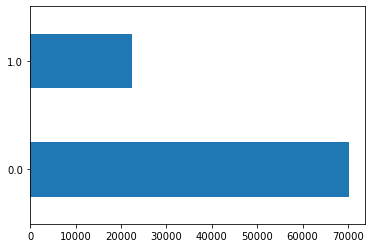

In [129]:
#pour faire une régression logistique, il faut que notre variable à prédire soit binaire
#les individus indemnes et légèrement blessés sont dans la catégorie 0 et les grièvement blessés et morts dans la classe 1
y.gravite[y.gravite == 1] = 0
y.gravite[y.gravite == 2] = 0
y.gravite[y.gravite == 3] = 1
y.gravite[y.gravite == 4] = 1
y['gravite'].value_counts()[:2].plot(kind='barh')

### On divise X en une partie train et une partie test, de même pour y

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [131]:
X_train

,catv_2,catv_3,catv_4,lum_2,lum_3,lum_5,agg_2,int_2,int_3,int_4,...,infra_5.0,infra_6.0,infra_7.0,gps_DT,prof_0.0,prof_2.0,prof_3.0,prof_4.0,choc_1,choc_2
88763,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
78637,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
64941,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41662,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49596,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22015,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
47483,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
44119,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
45104,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Il y a beaucoup de y = 0, on va donc rebalancer les données en construisant artificiellement des observations avec y = 1 en utilisant SMOTE.

In [132]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train,y_train=os.fit_sample(X_train, y_train)

Text(0.5, 0.98, 'Repartition des catégories de gravité après SMOTE dans y_train')

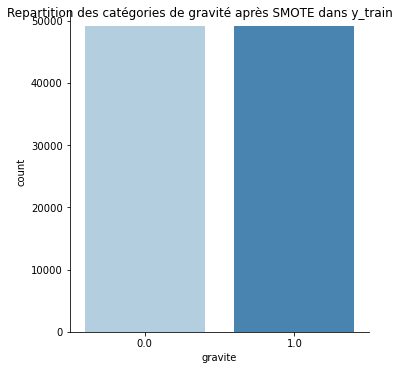

In [133]:
import seaborn as sns
sns.set_palette("Blues",2)
ax=sns.catplot(x="gravite", kind="count",  data=y_train)
ax.fig.suptitle('Repartition des catégories de gravité après SMOTE dans y_train')

### Application de la régression logistique

Hypothèses régression logistique :
    First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.
    Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.
    Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.
    Fourth, it requires that the independent variables are linearly related to the log odds.
    Finally, logistic regression typically requires a large sample size.

In [134]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.608297
         Iterations 13
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.122      
Dependent Variable: gravite          AIC:              119802.8037
Date:               2021-01-26 19:29 BIC:              120391.5874
No. Observations:   98372            Log-Likelihood:   -59839.    
Df Model:           61               LL-Null:          -68186.    
Df Residuals:       98310            LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     13.0000                                       
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
catv_2         0.0124    0.0010   12.1184  0.0000   0.0104   0.0144
catv_3         0.0159    0.0033    4.8428  0.000

Variables non signficatives : catv_4, int_8 (passages à niveau), atm_6.0 (vent fort), catr_5 (hors réseau public), catr_6 (parc de stationnement ouvert à la circulation publique), surf_3.0, surf_4.0, surf_5.0, surf_6.0, surf_7.0, surf_8.0 (flaques, inondée, enneigée, boue, verglacée, corps gras), infra_7.0 (zone de péage). 

### Model fitting

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
clfr = logreg.fit(X_train, y_train)

C:\Users\Station\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Station\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [136]:
y_pred = clfr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clfr.score(X_test, y_test)))
print('AUC score of logistic regression classifier on test set: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.70
AUC score of logistic regression classifier on test set: 0.62


#### Confusion matrix

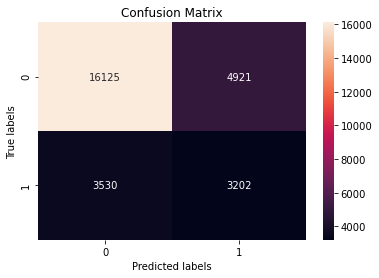

In [137]:
cm = confusion_matrix(y_test,y_pred)
   
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);


We get a total of 19 369 predictions that are right and 8 409 that are wrong.

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79     21046
         1.0       0.39      0.48      0.43      6732

    accuracy                           0.70     27778
   macro avg       0.61      0.62      0.61     27778
weighted avg       0.72      0.70      0.70     27778



In [139]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logit_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logit_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Régression logistique (aire = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux négatifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Figure 4 - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: shapes (98372,62) and (27778,62) not aligned: 62 (dim 1) != 27778 (dim 0)

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

### On peut regarder quel seuil de probabilité maximise la pertinence de notre modèle (au-delà de cette probabilité seuil, on prédit 1)

In [140]:
pred_proba_df = pd.DataFrame(logreg.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0) 
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred.iloc[:,1])
    print('Our testing accuracy is {}'.format(test_accuracy))


******** For i = 0.05 ******
Our testing accuracy is 0.2423500611995104

******** For i = 0.1 ******
Our testing accuracy is 0.2423500611995104

******** For i = 0.15 ******
Our testing accuracy is 0.24580603355173158

******** For i = 0.2 ******
Our testing accuracy is 0.32399740802073584

******** For i = 0.25 ******
Our testing accuracy is 0.40197278421772625

******** For i = 0.3 ******
Our testing accuracy is 0.4647922816617467

******** For i = 0.35 ******
Our testing accuracy is 0.5273597811217511

******** For i = 0.4 ******
Our testing accuracy is 0.587515299877601

******** For i = 0.45 ******
Our testing accuracy is 0.6625746994024048

******** For i = 0.5 ******
Our testing accuracy is 0.6957664338685291

******** For i = 0.55 ******
Our testing accuracy is 0.7172942616459068

******** For i = 0.6 ******
Our testing accuracy is 0.73828209374325

******** For i = 0.65 ******
Our testing accuracy is 0.7603139174886601

******** For i = 0.7 ******
Our testing accuracy is 0.76

In [141]:
y_test_pred = np.array(y_test_pred.iloc[:][1])
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [142]:
accu = []
for i in threshold_list:
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred.iloc[:,1])
    accu.append(test_accuracy)
accu = pd.DataFrame(accu, columns = ['accuracy'])
threshold = pd.DataFrame(threshold_list, columns = ['threshold'])
maxaccu = accu.max()

dff = pd.concat([threshold, accu], axis = 1)
dff

,threshold,accuracy
0,0.05,0.242350
1,0.10,0.242350
2,0.15,0.245806
3,0.20,0.323997
4,0.25,0.401973
5,0.30,0.464792
6,0.35,0.527360
7,0.40,0.587515
8,0.45,0.662575
9,0.50,0.695766


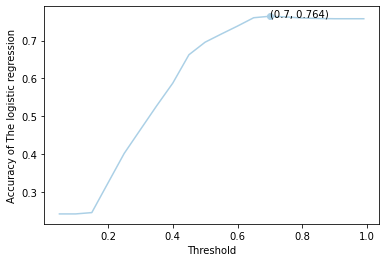

In [143]:
plt.figure()
plt.plot(dff['threshold'], dff['accuracy'])
plt.scatter(0.7,0.764) 
plt.text(0.7, 0.764, '({}, {})'.format(0.7, 0.764))
plt.xlabel("Threshold")
plt.ylabel("Accuracy of The logistic regression")
plt.show()

La probabilité seuil qui maximise la pertinence est 0.7 pour une pertinence de 76.4 %. Cependant, cela n'est pas gage d'un bon modèle car on va prédire encore moins de 1 (alors qu'on se trompait déjà beaucoup sur les 1). Pour améliorer notre modèle, on va devoir regarder la corrélation entre les variables car le soucis se trouve peut-être là.

In [144]:
dfcor = df.drop(['obsm', 'col', 'com', 'Num_Acc', 'num_veh', 'date','heure','lat', 'long', 'dep', 'situ'], axis = 1)
dfcor

,catv,gravite,lum,agg,int,atm,gps,catr,circ,vosp,prof,plan,surf,infra,choc
0,2,3.0,1,1,4,1.0,M,3,2.0,0.0,1.0,3.0,1.0,0.0,1
1,2,1.0,1,1,4,1.0,M,3,2.0,0.0,1.0,3.0,1.0,0.0,1
2,2,2.0,1,2,7,7.0,M,4,2.0,0.0,1.0,2.0,1.0,0.0,0
3,1,3.0,1,2,3,1.0,M,3,2.0,0.0,1.0,1.0,1.0,0.0,1
4,2,1.0,1,2,3,1.0,M,3,2.0,0.0,1.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97036,2,2.0,5,2,1,1.0,DT,2,2.0,0.0,1.0,1.0,1.0,0.0,0
97037,2,2.0,5,2,1,1.0,DT,4,0.0,0.0,2.0,2.0,1.0,0.0,1
97038,1,2.0,5,2,1,1.0,DT,4,0.0,0.0,2.0,2.0,1.0,0.0,1
97039,2,2.0,1,2,1,1.0,DT,2,2.0,0.0,1.0,1.0,1.0,0.0,1


Voici deux matrices de corrélations qui marchent pour les variables catégoriques. Cramers'V : It is based on a nominal variation of Pearson’s Chi-Square Test.
0 means no association and 1 is full association.
Cramer’s V is symmetrical = it is insensitive to swapping x1 and x2.

Theil's U : It is an asymmetric measure of association between categorical features.
Given the value of x1, how many possible states does x2 have, and how often do they occur.
Just like Cramer’s V, the output value is on the range of [0,1], with the same interpretations as before — but unlike Cramer’s V, it is asymmetric, meaning that knowing x1 means we know x2, but not vice-versa.

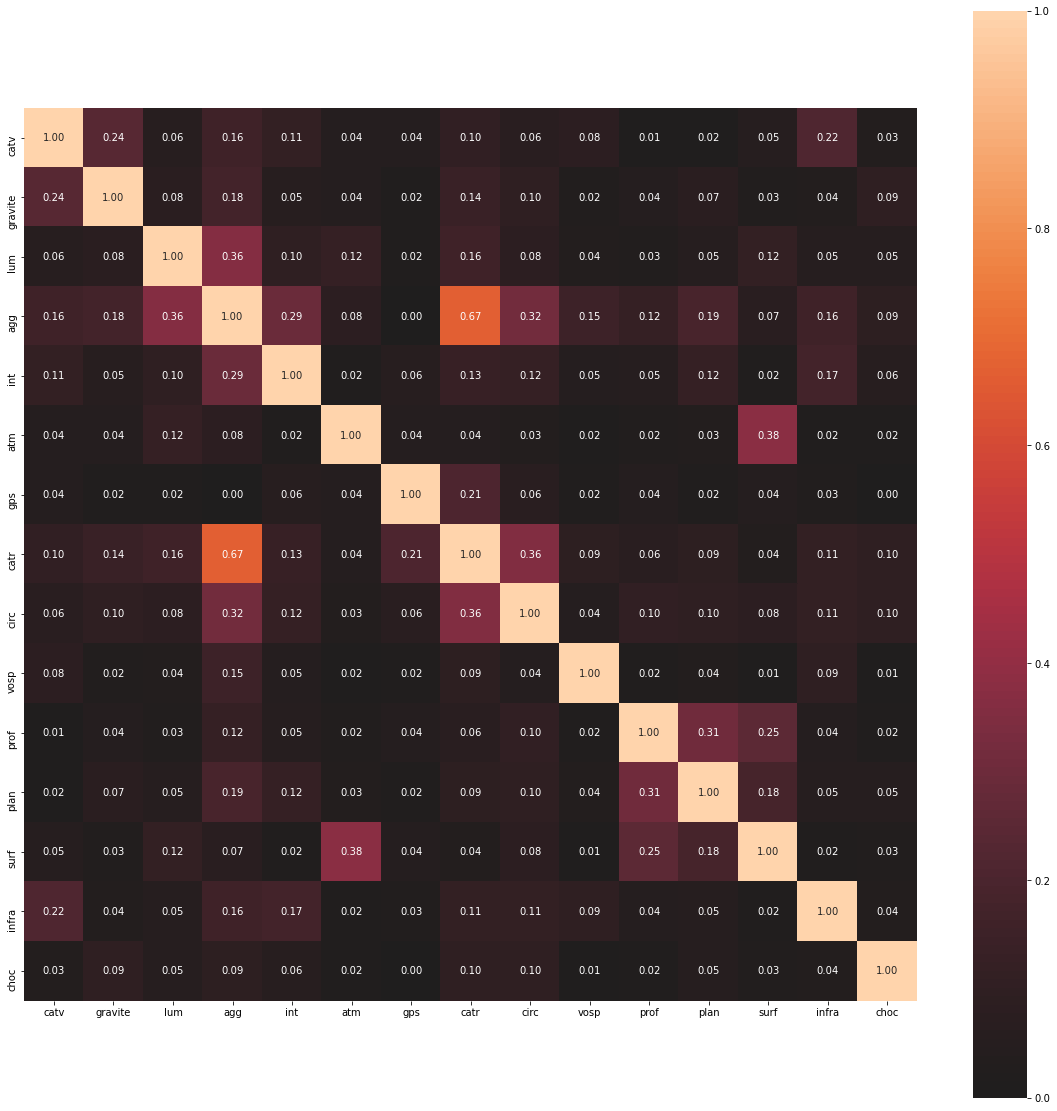

{'corr':              catv   gravite       lum       agg       int       atm       gps  \
 catv     1.000000  0.241609  0.060136  0.163220  0.113683  0.044775  0.039956   
 gravite  0.241609  1.000000  0.076904  0.178195  0.054711  0.041108  0.017074   
 lum      0.060136  0.076904  1.000000  0.364876  0.101363  0.120157  0.022254   
 agg      0.163220  0.178195  0.364876  1.000000  0.292361  0.078411  0.000000   
 int      0.113683  0.054711  0.101363  0.292361  1.000000  0.019182  0.056713   
 atm      0.044775  0.041108  0.120157  0.078411  0.019182  1.000000  0.044349   
 gps      0.039956  0.017074  0.022254  0.000000  0.056713  0.044349  1.000000   
 catr     0.104061  0.136310  0.162027  0.668827  0.132051  0.040832  0.206522   
 circ     0.064768  0.099286  0.080455  0.320155  0.124330  0.031530  0.064441   
 vosp     0.082186  0.023798  0.037812  0.154704  0.046258  0.015393  0.021288   
 prof     0.013410  0.041852  0.027668  0.121410  0.050856  0.024516  0.039072   
 plan   

In [145]:
import scipy.stats as ss
from dython import nominal
nominal.associations(dfcor, nominal_columns='all', plot=True, figsize=(20,20))

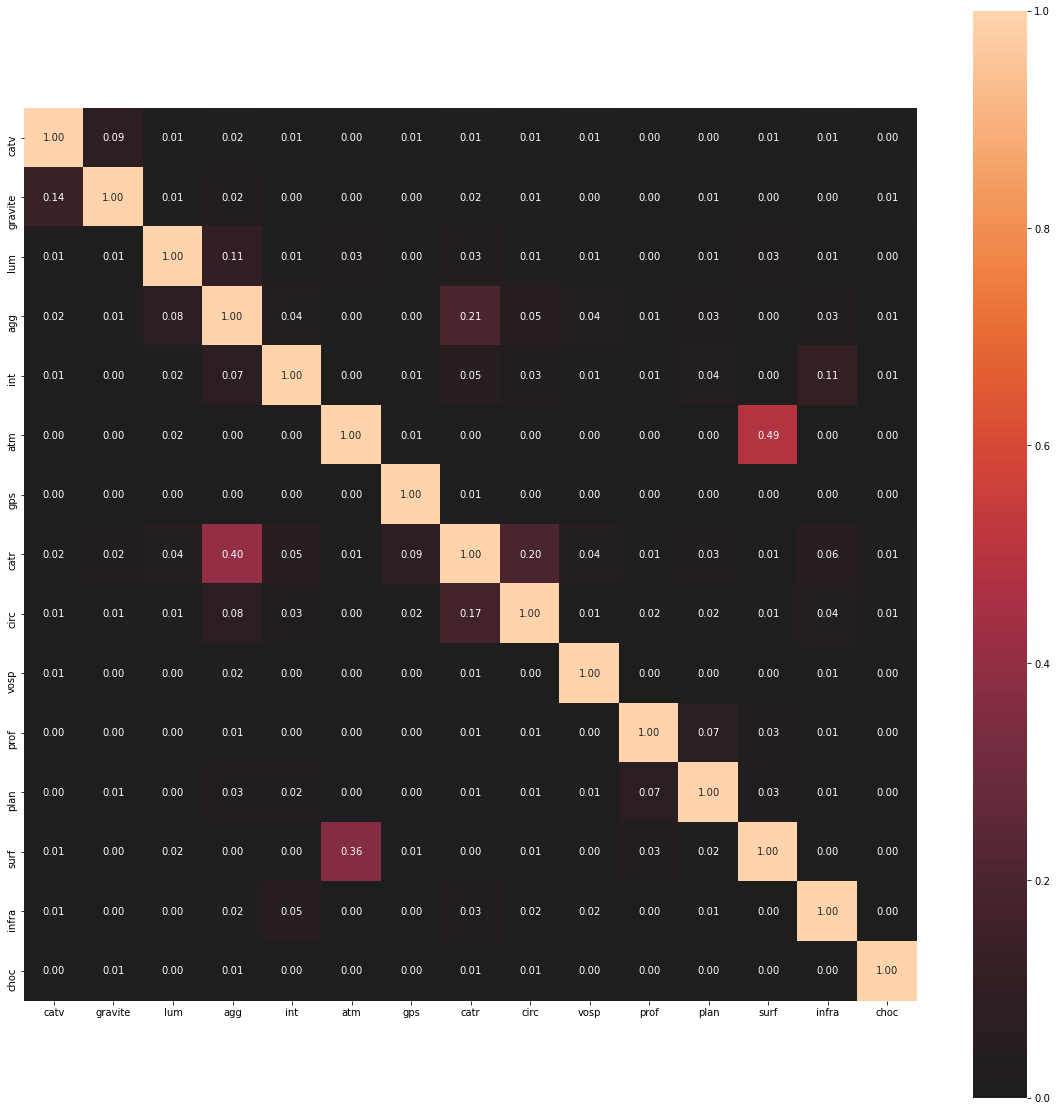

{'corr':              catv   gravite       lum           agg       int       atm  \
 catv     1.000000  0.092173  0.006511  2.047668e-02  0.005027  0.004276   
 gravite  0.139975  1.000000  0.008094  2.358542e-02  0.004089  0.003083   
 lum      0.007999  0.006548  1.000000  1.084479e-01  0.014080  0.026951   
 agg      0.017627  0.013369  0.075990  1.000000e+00  0.040037  0.003841   
 int      0.007702  0.004126  0.017561  7.126705e-02  1.000000  0.002274   
 atm      0.004373  0.002076  0.022436  4.563367e-03  0.001518  1.000000   
 gps      0.001066  0.000135  0.000256  5.062119e-07  0.001298  0.001679   
 catr     0.021451  0.023914  0.043396  4.007104e-01  0.054257  0.006739   
 circ     0.008360  0.013399  0.009643  7.664180e-02  0.026263  0.003022   
 vosp     0.006071  0.000814  0.002580  2.143502e-02  0.002488  0.000644   
 prof     0.000417  0.002202  0.001272  1.106760e-02  0.004347  0.001606   
 plan     0.000509  0.006578  0.004193  2.751937e-02  0.024087  0.002498   
 sur

In [146]:
nominal.associations(dfcor, nominal_columns='all',theil_u=True, plot=True, figsize=(20,20))

Il semblerait qu'il n'y ait pas une grande corrélation entre nos variables... Il serait peut-être pertinent d'utiliser un algorithme qui nous permettrait de séléctionner les variables les plus pertinentes pour notre modèle afin qu'il soit plus précis.

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [147]:
dfcor.gps[dfcor.gps == "M"] = 0
dfcor.gps[dfcor.gps == "DT"] = 1
os_data_X,os_data_y=os.fit_sample(dfcor, y)
os_data_X

<ipython-input-147-af2d1f7babaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcor.gps[dfcor.gps == "M"] = 0
<ipython-input-147-af2d1f7babaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcor.gps[dfcor.gps == "DT"] = 1


,catv,gravite,lum,agg,int,atm,gps,catr,circ,vosp,prof,plan,surf,infra,choc
0,2,3.0,1,1,4,1.0,0,3,2.0,0.000000,1.0,3.0,1.0,0.0,1
1,2,1.0,1,1,4,1.0,0,3,2.0,0.000000,1.0,3.0,1.0,0.0,1
2,2,2.0,1,2,7,7.0,0,4,2.0,0.000000,1.0,2.0,1.0,0.0,0
3,1,3.0,1,2,3,1.0,0,3,2.0,0.000000,1.0,1.0,1.0,0.0,1
4,2,1.0,1,2,3,1.0,0,3,2.0,0.000000,1.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140459,1,3.0,1,2,1,1.0,0,4,0.0,0.000000,1.0,1.0,1.0,0.0,1
140460,1,3.0,1,1,1,1.0,0,3,2.0,0.000000,1.0,2.0,1.0,0.0,0
140461,1,3.0,1,1,9,1.0,0,3,2.0,0.000000,2.0,3.0,1.0,0.0,1
140462,1,3.0,1,2,2,1.0,0,4,1.0,2.424441,1.0,1.0,1.0,0.0,1


In [148]:
data_final_vars=dfcor.columns.values.tolist()
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Station\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In logistic regression, omitted variables will bias the coefficients on included variables even if the omitted variables are uncorrelated with the included variables. I found a paper on this topic, but I can't make heads or tails of it.

(array([[0.40533545, 0.41046004]]), [array([0, 1], dtype=uint8)])

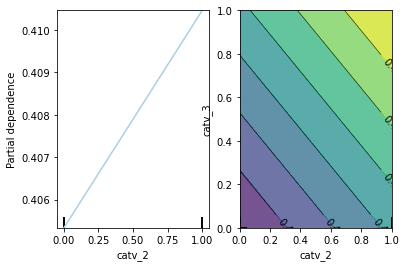

In [149]:
from sklearn.inspection import plot_partial_dependence, partial_dependence
plot_partial_dependence(clfr, X_test, [0, (0, 1)])
# get the partial dependence
partial_dependence(clfr, X_test, [0])

In [150]:
AME = result.get_margeff(at = "overall", method = "dydx")
print(AME.summary())

        Logit Marginal Effects       
Dep. Variable:                gravite
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
catv_2         0.0027      0.000     12.148      0.000       0.002       0.003
catv_3         0.0035      0.001      4.844      0.000       0.002       0.005
catv_4         0.0119      0.011      1.079      0.281      -0.010       0.033
lum_2          0.0105      0.002      6.945      0.000       0.008       0.013
lum_3          0.0290      0.004      7.223      0.000       0.021       0.037
lum_5          0.0052      0.001      8.313      0.000       0.004       0.006
agg_2          0.0013      0.000      5.247      0.000       0.001       0.002
int_2          0.0050      0.001      8.407      0.000       0.004       0.006
int_3          0.0060      0.001      8.125      0.000    

In [151]:
pval = pd.DataFrame(AME.pvalues, columns = ["P-values"])
pval

,P-values
0,5.891227e-34
1,1.269631e-06
2,2.805695e-01
3,3.772573e-12
4,5.067410e-13
...,...
57,2.700394e-17
58,2.017973e-06
59,1.841985e-05
60,1.634271e-10


In [152]:
ame = pd.DataFrame(AME.margeff, columns = ["Marginal_Effects"])
ame

,Marginal_Effects
0,0.002696
1,0.003451
2,0.011873
3,0.010512
4,0.029025
...,...
57,0.010399
58,0.046602
59,0.026700
60,0.002734


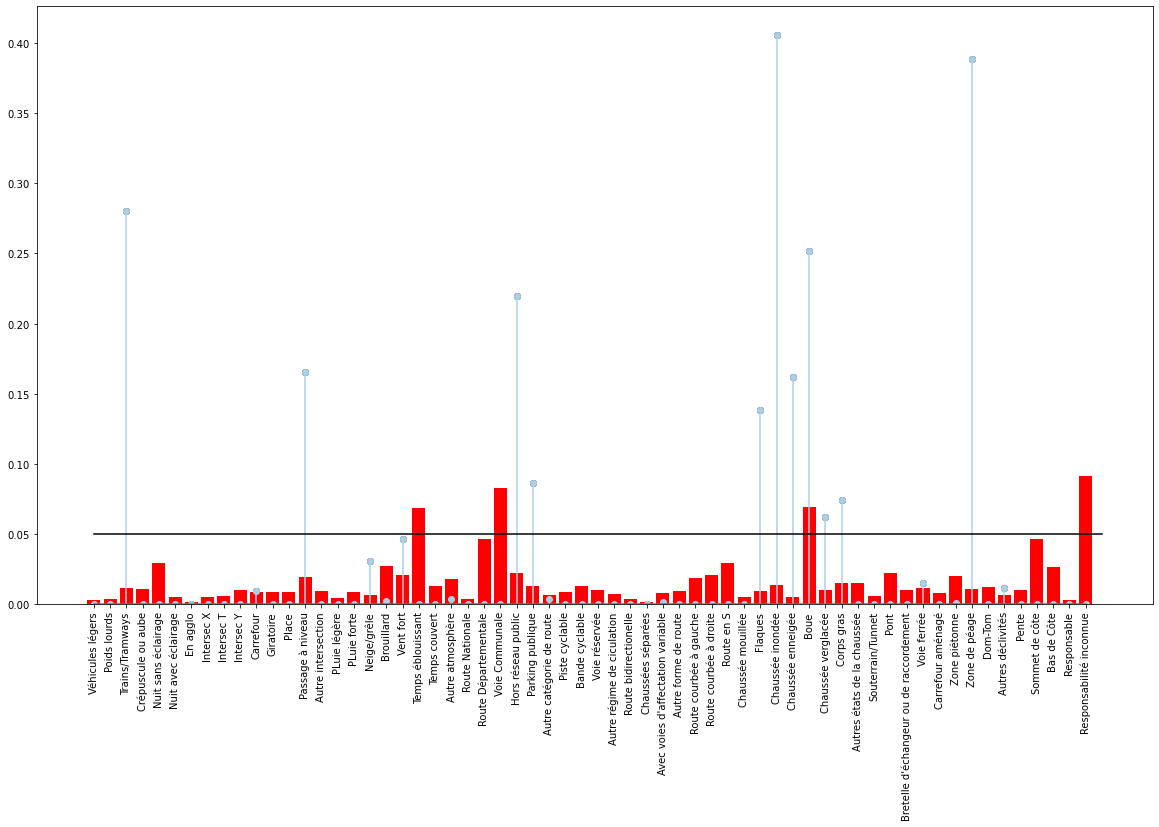

In [153]:
variables = ["Véhicules légers", "Poids lourds", "Trains/Tramways",
            "Crépuscule ou aube", "Nuit sans éclairage", "Nuit avec éclairage",
            "En agglo", "Intersec X", "Intersec T", "Intersec Y",
            "Carrefour", "Giratoire", "Place", "Passage à niveau", "Autre intersection",
            "PLuie légère", "PLuie forte", "Neige/grêle", "Brouillard", "Vent fort", "Temps éblouissant",
            "Temps couvert", "Autre atmosphère", "Route Nationale", "Route Départementale",
            "Voie Communale", "Hors réseau public", "Parking publique", "Autre catégorie de route",
            "Piste cyclable", "Bande cyclable", "Voie réservée", "Autre régime de ciculation",
            "Route bidirectionelle", "Chaussées séparées", "Avec voies d'affectation variable",
            "Autre forme de route", "Route courbée à gauche", "Route courbée à droite", "Route en S",
            "Chaussée mouillée", "Flaques", "Chaussée inondée", "Chaussée enneigée", "Boue",
            "Chaussée verglacée", "Corps gras", "Autres états de la chaussée", "Souterrain/Tunnet",
            "Pont", "Bretelle d'échangeur ou de raccordement", "Voie ferrée", 
            "Carrefour aménagé", "Zone piétonne", "Zone de péage", "Dom-Tom", "Autres déclivités",
            "Pente", "Sommet de côte", "Bas de Côte", "Responsable", "Responsabilité inconnue"]
plt.figure(figsize = (20,11))
plt.bar(ame.index.values, abs(ame["Marginal_Effects"]), tick_label = variables, color = "red")
plt.scatter(pval.index.values, abs(pval["P-values"]), color = "black")
plt.plot([0,62], [0.05, 0.05], color = "black")
plt.xticks(rotation = 90)
plt.stem(pval.index.values,abs(pval["P-values"]))
plt.show()

L'interprétation c'est : si la tige bleue dépasse la ligne noire, la p-value est plus grande que 0.05 donc c'est pas significatif et la barre rouge pas besoin de regarder si ça dépasse la ligne noire c'est juste l'effet marginal de variable estimé par le modèle, donc le meilleur indicateur de son importance.

Our first model is quite accurate, but we would like to improve it. Let's try to add some variables about users and vehicles. We would like to add :
1) Disponibles dans la table véhicules
- obs : si le véhicule a heurté un obstacle fixe et si oui, de quel type (donc 0 = pas heurté)
- obsm : exactement pareil mais pour un obstacle mobile
- manv : manoeuvre avant l'accident (beaucoup de valeurs prises)

2) Disponibles dans la table usagers
- trajet : motif du trajet
- les autres variables semblent trop compliquées à incorporer à notre base
- malheureusement, nous n'avons de variable "alcoolisé ou drogué" mais nous pourrions déterminer une propension des usagers à être dans un état second grâce à l'heure de l'accident : par exemple, il est probable qu'un accident survenant un samedi soir à 4h du matin aie un lien avec l'alcoolisation des usagers.


In [154]:
usage = usagers.loc[usagers['place'] == 1]
usager = usage.groupby(["Num_Acc", "num_veh", "trajet"]).count()
usa = pd.DataFrame(usager)
usa

place  catu  grav  sexe  secu  locp  actp  etatp  \
Num_Acc      num_veh trajet                                                     
201800000001 A01     5.0         1     1     1     1     1     1     1      1   
             B01     0.0         1     1     1     1     1     1     1      1   
201800000002 A01     0.0         1     1     1     1     1     1     1      1   
201800000003 A01     5.0         1     1     1     1     1     1     1      1   
             C01     0.0         1     1     1     1     1     1     1      1   
...                            ...   ...   ...   ...   ...   ...   ...    ...   
201800057781 A01     9.0         1     1     1     1     1     0     0      0   
201800057782 A01     9.0         1     1     1     1     1     0     0      0   
             B01     9.0         1     1     1     1     1     0     0      0   
201800057783 A01     9.0         1     1     1     1     1     0     0      0   
             B01     9.0         1     1     1     1     1     0     0      0   

                             an_nais  
Num_Acc      num_veh trajet           
201800000001 A01     5.0           1  
             B01     0.0           1  
201800000002 A01     0.0           1  
201800000003 A01     5.0           1  
             C01     0.0           1  
...                              ...  
201800057781 A01     9.0           1  
201800057782 A01     9.0           1  
             B01     9.0           1  
201800057783 A01     9.0           1  
             B01     9.0           1  

[95966 rows x 9 columns]

In [155]:
usa = usa.reset_index()
usa

,Num_Acc,num_veh,trajet,place,catu,grav,sexe,secu,locp,actp,etatp,an_nais
0,201800000001,A01,5.0,1,1,1,1,1,1,1,1,1
1,201800000001,B01,0.0,1,1,1,1,1,1,1,1,1
2,201800000002,A01,0.0,1,1,1,1,1,1,1,1,1
3,201800000003,A01,5.0,1,1,1,1,1,1,1,1,1
4,201800000003,C01,0.0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95961,201800057781,A01,9.0,1,1,1,1,1,0,0,0,1
95962,201800057782,A01,9.0,1,1,1,1,1,0,0,0,1
95963,201800057782,B01,9.0,1,1,1,1,1,0,0,0,1
95964,201800057783,A01,9.0,1,1,1,1,1,0,0,0,1


In [156]:
traj = usa[['Num_Acc', 'num_veh', 'trajet']]
traj

,Num_Acc,num_veh,trajet
0,201800000001,A01,5.0
1,201800000001,B01,0.0
2,201800000002,A01,0.0
3,201800000003,A01,5.0
4,201800000003,C01,0.0
...,...,...,...
95961,201800057781,A01,9.0
95962,201800057782,A01,9.0
95963,201800057782,B01,9.0
95964,201800057783,A01,9.0


<AxesSubplot:ylabel='Num_Acc'>

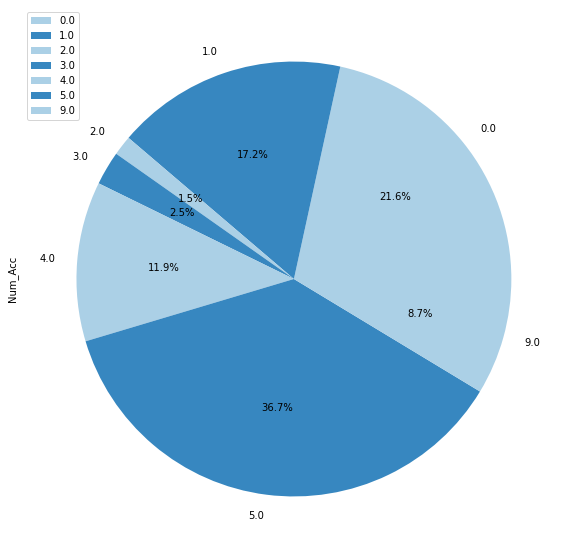

In [157]:
gptra = traj.groupby(["trajet"]).count()
dftrajet = pd.DataFrame(gptra["Num_Acc"])
dftrajet.plot.pie(y='Num_Acc', figsize=(10,10), autopct='%1.1f%%')

In [158]:
for i in range(len(traj)):
    if traj.iloc[i][2] == 0:
        traj.iloc[i][2] == 9

In [159]:
vehadd = vehic[[ 'Num_Acc', 'num_veh','obs', 'obsm', 'manv']]
vehadd["motif_trajet"] = usa["trajet"]

<ipython-input-159-f8bc3e69a8f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehadd["motif_trajet"] = usa["trajet"]


In [160]:
vehadd.dropna()

,Num_Acc,num_veh,obs,obsm,manv,motif_trajet
0,201800000001,B01,0.0,2.0,1.0,5.0
1,201800000001,A01,0.0,2.0,15.0,0.0
2,201800000002,A01,0.0,1.0,1.0,0.0
3,201800000003,A01,1.0,2.0,1.0,5.0
4,201800000003,B01,0.0,2.0,15.0,0.0
...,...,...,...,...,...,...
95961,201800056080,A01,0.0,1.0,1.0,9.0
95962,201800056081,A01,4.0,0.0,1.0,9.0
95963,201800056082,B01,0.0,2.0,1.0,9.0
95964,201800056082,A01,0.0,2.0,11.0,9.0


In [161]:
df.shape

(92592, 26)

In [162]:
df

,catv,Num_Acc,num_veh,obsm,gravite,date,heure,lum,agg,int,...,dep,catr,circ,vosp,prof,plan,surf,infra,situ,choc
0,2,201800000001,B01,2.0,3.0,2018-01-24,15,1,1,4,...,590,3,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1
1,2,201800000001,A01,2.0,1.0,2018-01-24,15,1,1,4,...,590,3,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1
2,2,201800000002,A01,1.0,2.0,2018-02-12,10,1,2,7,...,590,4,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0
3,1,201800000003,A01,2.0,3.0,2018-03-04,11,1,2,3,...,590,3,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1
4,2,201800000003,C01,0.0,1.0,2018-03-04,11,1,2,3,...,590,3,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97036,2,201800057781,A01,1.0,2.0,2018-12-22,21,5,2,1,...,976,2,2.0,0.0,1.0,1.0,1.0,0.0,3.0,0
97037,2,201800057782,A01,2.0,2.0,2018-12-23,19,5,2,1,...,976,4,0.0,0.0,2.0,2.0,1.0,0.0,3.0,1
97038,1,201800057782,B01,2.0,2.0,2018-12-23,19,5,2,1,...,976,4,0.0,0.0,2.0,2.0,1.0,0.0,3.0,1
97039,2,201800057783,B01,2.0,2.0,2018-12-28,14,1,2,1,...,976,2,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1


In [163]:
veh2grav = pd.merge(vehadd, grvmax, how='outer', indicator=True)
veh2grav

,Num_Acc,num_veh,obs,obsm,manv,motif_trajet,gravite,_merge
0,201800000001,B01,0.0,2.0,1.0,5.0,3.0,both
1,201800000001,A01,0.0,2.0,15.0,0.0,1.0,both
2,201800000002,A01,0.0,1.0,1.0,0.0,2.0,both
3,201800000003,A01,1.0,2.0,1.0,5.0,3.0,both
4,201800000003,B01,0.0,2.0,15.0,0.0,NaN,left_only
...,...,...,...,...,...,...,...,...
98871,201800057781,A01,0.0,1.0,19.0,NaN,2.0,both
98872,201800057782,A01,0.0,2.0,0.0,NaN,2.0,both
98873,201800057782,B01,0.0,2.0,0.0,NaN,2.0,both
98874,201800057783,B01,0.0,2.0,0.0,NaN,2.0,both


In [164]:
veh2grav = veh2grav.query('_merge == "both"')
del veh2grav['_merge']
veh2grav

,Num_Acc,num_veh,obs,obsm,manv,motif_trajet,gravite
0,201800000001,B01,0.0,2.0,1.0,5.0,3.0
1,201800000001,A01,0.0,2.0,15.0,0.0,1.0
2,201800000002,A01,0.0,1.0,1.0,0.0,2.0
3,201800000003,A01,1.0,2.0,1.0,5.0,3.0
5,201800000003,C01,0.0,0.0,24.0,5.0,1.0
...,...,...,...,...,...,...,...
98871,201800057781,A01,0.0,1.0,19.0,NaN,2.0
98872,201800057782,A01,0.0,2.0,0.0,NaN,2.0
98873,201800057782,B01,0.0,2.0,0.0,NaN,2.0
98874,201800057783,B01,0.0,2.0,0.0,NaN,2.0


In [165]:
veh2grav.dropna()

,Num_Acc,num_veh,obs,obsm,manv,motif_trajet,gravite
0,201800000001,B01,0.0,2.0,1.0,5.0,3.0
1,201800000001,A01,0.0,2.0,15.0,0.0,1.0
2,201800000002,A01,0.0,1.0,1.0,0.0,2.0
3,201800000003,A01,1.0,2.0,1.0,5.0,3.0
5,201800000003,C01,0.0,0.0,24.0,5.0,1.0
...,...,...,...,...,...,...,...
95961,201800056080,A01,0.0,1.0,1.0,9.0,3.0
95962,201800056081,A01,4.0,0.0,1.0,9.0,3.0
95963,201800056082,B01,0.0,2.0,1.0,9.0,1.0
95964,201800056082,A01,0.0,2.0,11.0,9.0,3.0


In [166]:
dff = pd.merge(veh2grav, df, on = ["Num_Acc", "num_veh"], how = "left")
dff

,Num_Acc,num_veh,obs,obsm_x,manv,motif_trajet,gravite_x,catv,obsm_y,gravite_y,...,dep,catr,circ,vosp,prof,plan,surf,infra,situ,choc
0,201800000001,B01,0.0,2.0,1.0,5.0,3.0,2.0,2.0,3.0,...,590.0,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0
1,201800000001,A01,0.0,2.0,15.0,0.0,1.0,2.0,2.0,1.0,...,590.0,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0
2,201800000002,A01,0.0,1.0,1.0,0.0,2.0,2.0,1.0,2.0,...,590.0,4.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
3,201800000003,A01,1.0,2.0,1.0,5.0,3.0,1.0,2.0,3.0,...,590.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4,201800000003,C01,0.0,0.0,24.0,5.0,1.0,2.0,0.0,1.0,...,590.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97036,201800057781,A01,0.0,1.0,19.0,NaN,2.0,2.0,1.0,2.0,...,976.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0
97037,201800057782,A01,0.0,2.0,0.0,NaN,2.0,2.0,2.0,2.0,...,976.0,4.0,0.0,0.0,2.0,2.0,1.0,0.0,3.0,1.0
97038,201800057782,B01,0.0,2.0,0.0,NaN,2.0,1.0,2.0,2.0,...,976.0,4.0,0.0,0.0,2.0,2.0,1.0,0.0,3.0,1.0
97039,201800057783,B01,0.0,2.0,0.0,NaN,2.0,2.0,2.0,2.0,...,976.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0


In [167]:
dff.dropna()

,Num_Acc,num_veh,obs,obsm_x,manv,motif_trajet,gravite_x,catv,obsm_y,gravite_y,...,dep,catr,circ,vosp,prof,plan,surf,infra,situ,choc
0,201800000001,B01,0.0,2.0,1.0,5.0,3.0,2.0,2.0,3.0,...,590.0,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0
1,201800000001,A01,0.0,2.0,15.0,0.0,1.0,2.0,2.0,1.0,...,590.0,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0
2,201800000002,A01,0.0,1.0,1.0,0.0,2.0,2.0,1.0,2.0,...,590.0,4.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
3,201800000003,A01,1.0,2.0,1.0,5.0,3.0,1.0,2.0,3.0,...,590.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4,201800000003,C01,0.0,0.0,24.0,5.0,1.0,2.0,0.0,1.0,...,590.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94172,201800056080,A01,0.0,1.0,1.0,9.0,3.0,2.0,1.0,3.0,...,974.0,2.0,2.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0
94173,201800056081,A01,4.0,0.0,1.0,9.0,3.0,2.0,0.0,3.0,...,974.0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
94174,201800056082,B01,0.0,2.0,1.0,9.0,1.0,2.0,2.0,1.0,...,974.0,2.0,1.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0
94175,201800056082,A01,0.0,2.0,11.0,9.0,3.0,1.0,2.0,3.0,...,974.0,2.0,1.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0


In [168]:
dff = dff.drop(['obsm_y', 'gravite_y'], axis = 1)
dff

,Num_Acc,num_veh,obs,obsm_x,manv,motif_trajet,gravite_x,catv,date,heure,...,dep,catr,circ,vosp,prof,plan,surf,infra,situ,choc
0,201800000001,B01,0.0,2.0,1.0,5.0,3.0,2.0,2018-01-24,15,...,590.0,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0
1,201800000001,A01,0.0,2.0,15.0,0.0,1.0,2.0,2018-01-24,15,...,590.0,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0
2,201800000002,A01,0.0,1.0,1.0,0.0,2.0,2.0,2018-02-12,10,...,590.0,4.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
3,201800000003,A01,1.0,2.0,1.0,5.0,3.0,1.0,2018-03-04,11,...,590.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4,201800000003,C01,0.0,0.0,24.0,5.0,1.0,2.0,2018-03-04,11,...,590.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97036,201800057781,A01,0.0,1.0,19.0,NaN,2.0,2.0,2018-12-22,21,...,976.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0
97037,201800057782,A01,0.0,2.0,0.0,NaN,2.0,2.0,2018-12-23,19,...,976.0,4.0,0.0,0.0,2.0,2.0,1.0,0.0,3.0,1.0
97038,201800057782,B01,0.0,2.0,0.0,NaN,2.0,1.0,2018-12-23,19,...,976.0,4.0,0.0,0.0,2.0,2.0,1.0,0.0,3.0,1.0
97039,201800057783,B01,0.0,2.0,0.0,NaN,2.0,2.0,2018-12-28,14,...,976.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0


In [169]:
dff.isnull().sum()

Num_Acc            0
num_veh            0
obs              163
obsm_x           118
manv             116
motif_trajet    2864
gravite_x          0
catv            4449
date            4449
heure           4449
lum             4449
agg             4449
int             4449
atm             4449
col             4449
com             4449
gps             4449
lat             4449
long            4449
dep             4449
catr            4449
circ            4449
vosp            4449
prof            4449
plan            4449
surf            4449
infra           4449
situ            4449
choc            4449
dtype: int64

In [170]:
dff = dff.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
dff

,Num_Acc,num_veh,obs,obsm_x,manv,motif_trajet,gravite_x,catv,date,heure,...,dep,catr,circ,vosp,prof,plan,surf,infra,situ,choc
0,201800000001,B01,0.0,2.0,1.0,5.0,3.0,2.0,2018-01-24,15,...,590.0,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0
1,201800000001,A01,0.0,2.0,15.0,0.0,1.0,2.0,2018-01-24,15,...,590.0,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0
2,201800000002,A01,0.0,1.0,1.0,0.0,2.0,2.0,2018-02-12,10,...,590.0,4.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
3,201800000003,A01,1.0,2.0,1.0,5.0,3.0,1.0,2018-03-04,11,...,590.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4,201800000003,C01,0.0,0.0,24.0,5.0,1.0,2.0,2018-03-04,11,...,590.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94172,201800056080,A01,0.0,1.0,1.0,9.0,3.0,2.0,2018-07-07,11,...,974.0,2.0,2.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0
94173,201800056081,A01,4.0,0.0,1.0,9.0,3.0,2.0,2018-09-09,10,...,974.0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
94174,201800056082,B01,0.0,2.0,1.0,9.0,1.0,2.0,2018-11-02,16,...,974.0,2.0,1.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0
94175,201800056082,A01,0.0,2.0,11.0,9.0,3.0,1.0,2018-11-02,16,...,974.0,2.0,1.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0


In [171]:
dff.gps[dff.gps == "A"] = "DT"
dff.gps[dff.gps == "G"] = "DT"
dff.gps[dff.gps == "R"] = "DT"
dff.gps[dff.gps == "Y"] = "DT"
dff.lum[dff.lum == 4] = 3
dff.catr[dff.catr == 7] = 9
dff.obs[dff.obs == 4] = 3
dff.obs[dff.obs == 5] = 3 #réuni les glissières
dff.obsm_x[dff.obsm_x == 0] = 9
dff.manv[dff.manv == 2] = 1 #même sens même file comme sans changement de direction
dff.manv[dff.manv == 0] = 1
dff.motif_trajet[dff.motif_trajet == 0] = 9
dff.motif_trajet[dff.motif_trajet == 2] = 1
dff.motif_trajet[dff.motif_trajet == 3] = 1 #trajet de routine

<ipython-input-171-66e8c1482c9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.gps[dff.gps == "A"] = "DT"
C:\Users\Station\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-171-66e8c1482c9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.gps[dff.gps == "G"] = "DT"
<ipython-input-171-66e8c1482c9b>:3: SettingWithCopyWarn

In [172]:
X1 = dff.drop(['gravite_x', 'col', 'com', 'Num_Acc', 'num_veh', 'date', 'heure','lat', 'long', 'dep', 'situ'], axis = 1)
X1

,obs,obsm_x,manv,motif_trajet,catv,lum,agg,int,atm,gps,catr,circ,vosp,prof,plan,surf,infra,choc
0,0.0,2.0,1.0,5.0,2.0,1.0,1.0,4.0,1.0,M,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0
1,0.0,2.0,15.0,9.0,2.0,1.0,1.0,4.0,1.0,M,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0
2,0.0,1.0,1.0,9.0,2.0,1.0,2.0,7.0,7.0,M,4.0,2.0,0.0,1.0,2.0,1.0,0.0,0.0
3,1.0,2.0,1.0,5.0,1.0,1.0,2.0,3.0,1.0,M,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0
4,0.0,9.0,24.0,5.0,2.0,1.0,2.0,3.0,1.0,M,3.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94172,0.0,1.0,1.0,9.0,2.0,1.0,2.0,1.0,1.0,DT,2.0,2.0,0.0,2.0,1.0,1.0,0.0,1.0
94173,3.0,9.0,1.0,9.0,2.0,1.0,1.0,1.0,1.0,DT,2.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0
94174,0.0,2.0,1.0,9.0,2.0,1.0,1.0,1.0,1.0,DT,2.0,1.0,0.0,2.0,1.0,1.0,3.0,1.0
94175,0.0,2.0,11.0,9.0,1.0,1.0,1.0,1.0,1.0,DT,2.0,1.0,0.0,2.0,1.0,1.0,3.0,1.0


In [173]:
X1=pd.get_dummies(data=X1, columns=['catv', 'obs', 'obsm_x', "manv", 'motif_trajet', 'lum',"agg","int", "atm", "catr","vosp", "circ", "plan", "surf", "infra", "gps", "prof", "choc"])
X1.columns

Index(['catv_1.0', 'catv_2.0', 'catv_3.0', 'catv_4.0', 'obs_0.0', 'obs_1.0',
       'obs_2.0', 'obs_3.0', 'obs_6.0', 'obs_7.0',
       ...
       'gps_DT', 'gps_M', 'prof_0.0', 'prof_1.0', 'prof_2.0', 'prof_3.0',
       'prof_4.0', 'choc_0.0', 'choc_1.0', 'choc_2.0'],
      dtype='object', length=124)

In [174]:
var_to_drop=['catv_1.0', 'lum_1.0', 'agg_1.0', 'obs_0.0', 'obsm_x_1.0', 'manv_1.0','motif_trajet_1.0', 'int_1.0','atm_1.0','catr_1.0','vosp_0.0', 'circ_1.0', 'plan_1.0', 'surf_1.0', 'infra_0.0', 'gps_M', 'prof_1.0', "choc_0.0"]
X1= X1.drop(var_to_drop, axis=1)
X1.columns

Index(['catv_2.0', 'catv_3.0', 'catv_4.0', 'obs_1.0', 'obs_2.0', 'obs_3.0',
       'obs_6.0', 'obs_7.0', 'obs_8.0', 'obs_9.0',
       ...
       'infra_5.0', 'infra_6.0', 'infra_7.0', 'gps_DT', 'prof_0.0', 'prof_2.0',
       'prof_3.0', 'prof_4.0', 'choc_1.0', 'choc_2.0'],
      dtype='object', length=106)

In [175]:
X1

,catv_2.0,catv_3.0,catv_4.0,obs_1.0,obs_2.0,obs_3.0,obs_6.0,obs_7.0,obs_8.0,obs_9.0,...,infra_5.0,infra_6.0,infra_7.0,gps_DT,prof_0.0,prof_2.0,prof_3.0,prof_4.0,choc_1.0,choc_2.0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94172,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
94173,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
94174,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
94175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [176]:
y1 = dff['gravite_x']
y1.shape

(89816,)

In [177]:
y1 = np.reshape([y1], (89816,1))
y1 = pd.DataFrame(y1, columns = ["gravite"])

In [178]:
y1.gravite[y1.gravite == 1] = 0
y1.gravite[y1.gravite == 2] = 0
y1.gravite[y1.gravite == 3] = 1
y1.gravite[y1.gravite == 4] = 1

In [179]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
X1_train,y1_train=os.fit_sample(X1_train, y1_train)

Text(0.5, 0.98, 'Repartition des catégories de gravité après SMOTE dans y1_train')

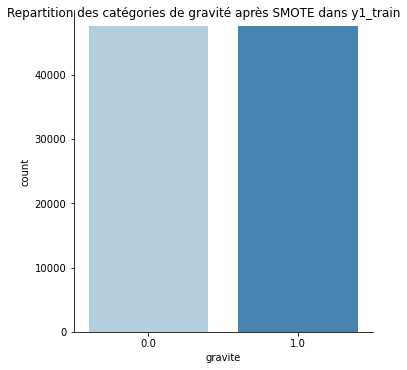

In [180]:
sns.set_palette("Blues",2)
ax=sns.catplot(x='gravite', kind="count",  data=y1_train)
ax.fig.suptitle('Repartition des catégories de gravité après SMOTE dans y1_train')

In [181]:
logit_model1=sm.Logit(y1_train,X1_train)
result1=logit_model1.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.547652
         Iterations 13
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.210      
Dependent Variable: gravite          AIC:              104522.2223
Date:               2021-01-26 20:03 BIC:              105525.4161
No. Observations:   95234            Log-Likelihood:   -52155.    
Df Model:           105              LL-Null:          -66011.    
Df Residuals:       95128            LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     13.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
catv_2.0            0.0102   0.0009 11.8081 0.0000  0.0085  0.0119
catv_3.0            0.0159   0.0033  4.8558 0.0000  

In [182]:
clfr1 = logreg.fit(X1_train, y1_train)
y_pred1 = clfr1.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clfr1.score(X1_test, y1_test)))
print('AUC score of logistic regression classifier on test set: {:.2f}'.format(roc_auc_score(y1_test, y_pred1)))

C:\Users\Station\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy of logistic regression classifier on test set: 0.76
AUC score of logistic regression classifier on test set: 0.62


C:\Users\Station\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


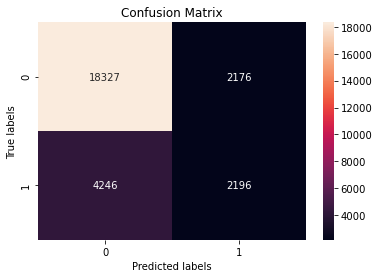

In [183]:
cm = confusion_matrix(y1_test,y_pred1)
   
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);



In [184]:
AME1 = result1.get_margeff(at = "overall", method = "dydx")
pval1 = pd.DataFrame(AME1.pvalues, columns = ["P-values"])
ame1 = pd.DataFrame(AME1.margeff, columns = ["Marginal_Effects"])

In [185]:
variables = ["Véhicules légers", "Poids lourds", "Trains/Tramways", "Heurte Véhicule en stationnement",
             "Heurte arbre", "Heurte glissière", 'Heurte Bâtiment,mur, pile de pont',
             "Heurte support de signalisation", "Heurte poteau", "Heurte mobilier urbain",
             "Heurte parapet", "Heurte ilot, refuge, borne haute", "Heurte bordure de trottoir",
             "Fossé, talus, paroie rocheuse", "Heurte autre obstacle fixe sur chaussée",
             "Heurte autre obstacle fixe sur trottoir ou accotement", "Sortie de chaussée sans obstacle",
             "Heurte véhicule", "Heurte véhicule sur rail", 
             "Heurte animal domestique", "Heurte animal sauvage", "Heurte autre obstacle mobile",
             "Entre 2 files", "En marche arrière", "A contresens", "En franchissant le terre-plein central",
             "Dans le couloir bus, dans le même sens", "Dans le couloir bus, en sens inverse",
             "En s'insérant", "En faisant demi-tour sur la chaussée", "Change de file à gauche",
             "Change de file à droite", "Se déporte à gauche", "Se déporte à droite",
             "Tourne à gauche", "Tourne à droite", "Dépasse à gauche", "Dépasse à droite",
             "Traverse la chaussée", "Stationne", "Manoeuvre d'évitement", "Ouverture de porte",
             "Arrêté", "Stationné (avec occupants)", "Utilisation professionnelle",
             "Promenade/Loisirs", "Autre",
             "Crépuscule ou aube", "Nuit sans éclairage", "Nuit avec éclairage",
             "En agglo", "Intersec X", "Intersec T", "Intersec Y",
             "Carrefour", "Giratoire", "Place", "Passage à niveau", "Autre intersection",
             "PLuie légère", "PLuie forte", "Neige/grêle", "Brouillard", "Vent fort", "Temps éblouissant",
             "Temps couvert", "Autre atmosphère", "Route Nationale", "Route Départementale",
             "Voie Communale", "Hors réseau public", "Parking publique", "Autre catégorie de route",
             "Piste cyclable", "Bande cyclable", "Voie réservée", "Autre régime de ciculation",
             "Route bidirectionelle", "Chaussées séparées", "Avec voies d'affectation variable",
             "Autre forme de route", "Route courbée à gauche", "Route courbée à droite", "Route en S",
             "Chaussée mouillée", "Flaques", "Chaussée inondée", "Chaussée enneigée", "Boue",
             "Chaussée verglacée", "Corps gras", "Autres états de la chaussée", "Souterrain/Tunnet",
             "Pont", "Bretelle d'échangeur ou de raccordement", "Voie ferrée", 
             "Carrefour aménagé", "Zone piétonne", "Zone de péage", "Dom-Tom", "Autres déclivités",
             "Pente", "Sommet de côte", "Bas de Côte", "Responsable", "Responsabilité inconnue"]
len(variables)

106

In [186]:
pval1.shape

(106, 1)

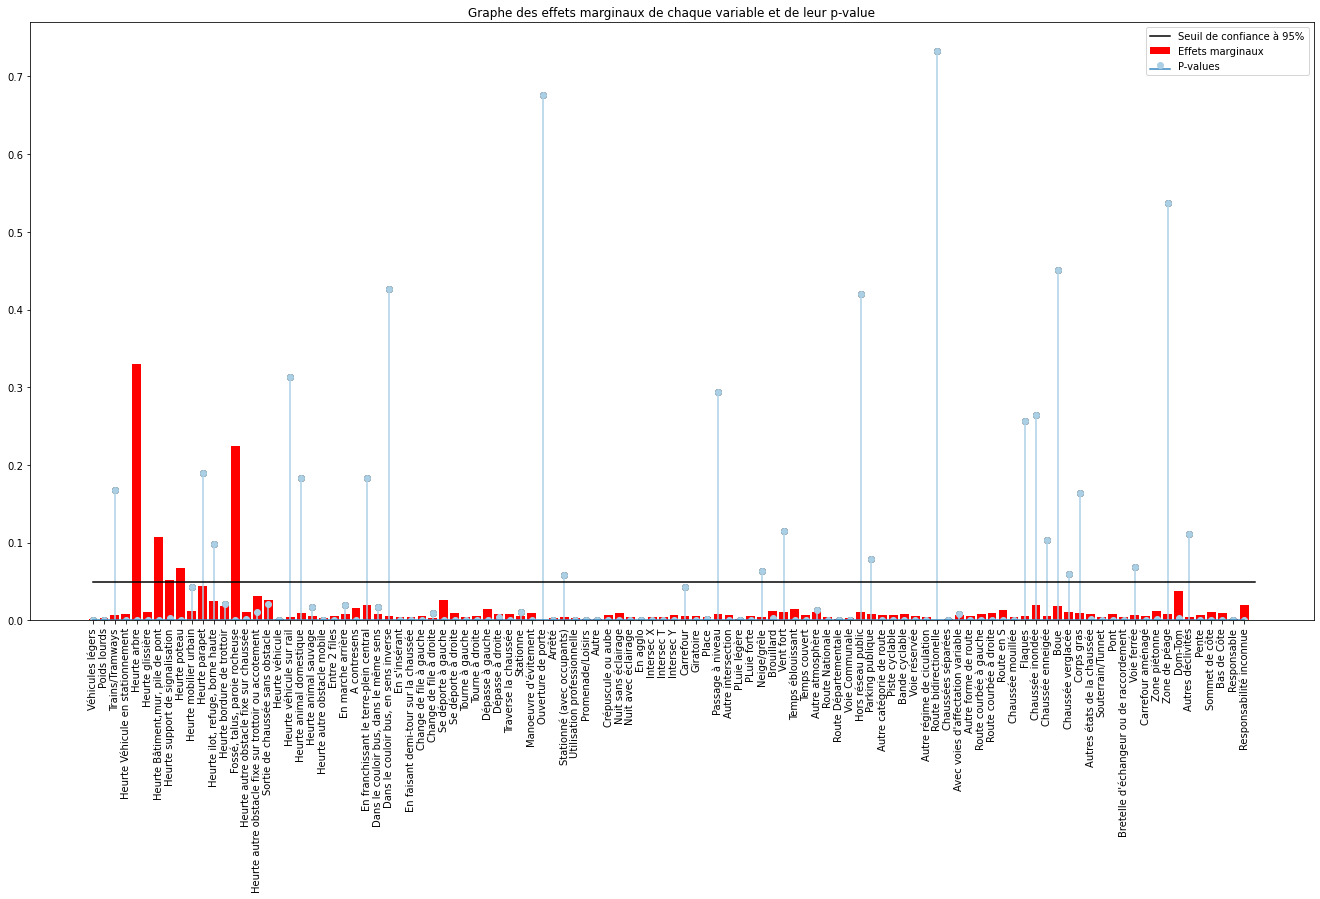

In [187]:
plt.figure(figsize = (23,11))
plt.bar(ame1.index.values, abs(ame1["Marginal_Effects"]), tick_label = variables, color = "red", label = "Effets marginaux")
plt.scatter(pval1.index.values, abs(pval1["P-values"]), color = "black")
plt.plot([0,106], [0.05, 0.05], color = "black", label = "Seuil de confiance à 95%")
plt.xticks(rotation = 90)
plt.stem(pval1.index.values,abs(pval1["P-values"]), label = "P-values")
plt.title("Graphe des effets marginaux de chaque variable et de leur p-value")
plt.legend()
plt.show()

This model seems to be more accurate. But we can improve it again.

### Création d'une variable "Plus forte probabilité que l'usager soit alcolisée" et intégration au modèle

In [188]:
dff2 = dff
dff2.head(6)

,Num_Acc,num_veh,obs,obsm_x,manv,motif_trajet,gravite_x,catv,date,heure,...,dep,catr,circ,vosp,prof,plan,surf,infra,situ,choc
0,201800000001,B01,0.0,2.0,1.0,5.0,3.0,2.0,2018-01-24,15,...,590.0,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0
1,201800000001,A01,0.0,2.0,15.0,9.0,1.0,2.0,2018-01-24,15,...,590.0,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0
2,201800000002,A01,0.0,1.0,1.0,9.0,2.0,2.0,2018-02-12,10,...,590.0,4.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
3,201800000003,A01,1.0,2.0,1.0,5.0,3.0,1.0,2018-03-04,11,...,590.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4,201800000003,C01,0.0,9.0,24.0,5.0,1.0,2.0,2018-03-04,11,...,590.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
5,201800000004,B01,0.0,2.0,1.0,5.0,3.0,1.0,2018-05-05,17,...,590.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


In [189]:
dff2['jour'] = dff2['date'].dt.dayofweek
dff2.head(6)

<ipython-input-189-531a1d618dd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff2['jour'] = dff2['date'].dt.dayofweek


,Num_Acc,num_veh,obs,obsm_x,manv,motif_trajet,gravite_x,catv,date,heure,...,catr,circ,vosp,prof,plan,surf,infra,situ,choc,jour
0,201800000001,B01,0.0,2.0,1.0,5.0,3.0,2.0,2018-01-24,15,...,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,2
1,201800000001,A01,0.0,2.0,15.0,9.0,1.0,2.0,2018-01-24,15,...,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,2
2,201800000002,A01,0.0,1.0,1.0,9.0,2.0,2.0,2018-02-12,10,...,4.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0
3,201800000003,A01,1.0,2.0,1.0,5.0,3.0,1.0,2018-03-04,11,...,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,6
4,201800000003,C01,0.0,9.0,24.0,5.0,1.0,2.0,2018-03-04,11,...,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,6
5,201800000004,B01,0.0,2.0,1.0,5.0,3.0,1.0,2018-05-05,17,...,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,5


In [190]:
dff2.heure = dff2.heure.astype('int')

C:\Users\Station\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [191]:
dff2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89816 entries, 0 to 94176
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Num_Acc       89816 non-null  int64         
 1   num_veh       89816 non-null  object        
 2   obs           89816 non-null  float64       
 3   obsm_x        89816 non-null  float64       
 4   manv          89816 non-null  float64       
 5   motif_trajet  89816 non-null  float64       
 6   gravite_x     89816 non-null  float64       
 7   catv          89816 non-null  float64       
 8   date          89816 non-null  datetime64[ns]
 9   heure         89816 non-null  int32         
 10  lum           89816 non-null  float64       
 11  agg           89816 non-null  float64       
 12  int           89816 non-null  float64       
 13  atm           89816 non-null  float64       
 14  col           89816 non-null  float64       
 15  com           89816 non-null  float6

In [192]:
def f(row):
    if (row['jour'] == 3) & (row['heure'] >= 19 ) & ((row['motif_trajet'] == 5) | (row['motif_trajet'] == 9)) :
        val = 1
    elif (row['jour'] == 4) & ((row['heure'] >= 19 ) | (row['heure'] <= 6)) & ((row['motif_trajet'] == 5) | (row['motif_trajet'] == 9)) :
        val = 1
    elif (row['jour'] == 5) & ((row['heure'] >= 19) | (row['heure'] <= 6)) & ((row['motif_trajet'] == 5) | (row['motif_trajet'] == 9)) :
        val = 1
    elif (row['jour'] == 6) & ((row['heure'] <= 6) | ((row['heure'] >= 11) & (row['heure'] <= 18))) & ((row['motif_trajet'] == 5) | (row['motif_trajet'] == 9)) :
        val = 1
    else:
        val = 0
    return val

In [193]:
dff2['proba_alcool'] = dff2.apply(f, axis=1)

<ipython-input-193-6e8d1b8a1a0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff2['proba_alcool'] = dff2.apply(f, axis=1)


In [194]:
dff2 = dff2.drop(['jour'], axis=1)
dff2.head()

,Num_Acc,num_veh,obs,obsm_x,manv,motif_trajet,gravite_x,catv,date,heure,...,catr,circ,vosp,prof,plan,surf,infra,situ,choc,proba_alcool
0,201800000001,B01,0.0,2.0,1.0,5.0,3.0,2.0,2018-01-24,15,...,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,0
1,201800000001,A01,0.0,2.0,15.0,9.0,1.0,2.0,2018-01-24,15,...,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,0
2,201800000002,A01,0.0,1.0,1.0,9.0,2.0,2.0,2018-02-12,10,...,4.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0
3,201800000003,A01,1.0,2.0,1.0,5.0,3.0,1.0,2018-03-04,11,...,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1
4,201800000003,C01,0.0,9.0,24.0,5.0,1.0,2.0,2018-03-04,11,...,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1


In [195]:
dff2.proba_alcool.value_counts()

0    78076
1    11740
Name: proba_alcool, dtype: int64

In [196]:
X2 = dff2.drop(['gravite_x', 'col', 'com', 'Num_Acc', 'num_veh', 'date', 'heure','lat', 'long', 'dep', 'situ'], axis = 1)
X2

,obs,obsm_x,manv,motif_trajet,catv,lum,agg,int,atm,gps,catr,circ,vosp,prof,plan,surf,infra,choc,proba_alcool
0,0.0,2.0,1.0,5.0,2.0,1.0,1.0,4.0,1.0,M,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,0
1,0.0,2.0,15.0,9.0,2.0,1.0,1.0,4.0,1.0,M,3.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,0
2,0.0,1.0,1.0,9.0,2.0,1.0,2.0,7.0,7.0,M,4.0,2.0,0.0,1.0,2.0,1.0,0.0,0.0,0
3,1.0,2.0,1.0,5.0,1.0,1.0,2.0,3.0,1.0,M,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1
4,0.0,9.0,24.0,5.0,2.0,1.0,2.0,3.0,1.0,M,3.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94172,0.0,1.0,1.0,9.0,2.0,1.0,2.0,1.0,1.0,DT,2.0,2.0,0.0,2.0,1.0,1.0,0.0,1.0,0
94173,3.0,9.0,1.0,9.0,2.0,1.0,1.0,1.0,1.0,DT,2.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,0
94174,0.0,2.0,1.0,9.0,2.0,1.0,1.0,1.0,1.0,DT,2.0,1.0,0.0,2.0,1.0,1.0,3.0,1.0,0
94175,0.0,2.0,11.0,9.0,1.0,1.0,1.0,1.0,1.0,DT,2.0,1.0,0.0,2.0,1.0,1.0,3.0,1.0,0


In [197]:
X2=pd.get_dummies(data=X2, columns=['catv', 'obs', 'obsm_x', "manv", 'motif_trajet', 'lum',"agg","int", "atm", "catr","vosp", "circ", "plan", "surf", "infra", "gps", "prof", "choc","proba_alcool"])
X2.columns

Index(['catv_1.0', 'catv_2.0', 'catv_3.0', 'catv_4.0', 'obs_0.0', 'obs_1.0',
       'obs_2.0', 'obs_3.0', 'obs_6.0', 'obs_7.0',
       ...
       'prof_0.0', 'prof_1.0', 'prof_2.0', 'prof_3.0', 'prof_4.0', 'choc_0.0',
       'choc_1.0', 'choc_2.0', 'proba_alcool_0', 'proba_alcool_1'],
      dtype='object', length=126)

In [198]:
var_to_drop=['catv_1.0', 'lum_1.0', 'agg_1.0', 'obs_0.0', 'obsm_x_1.0', 'manv_1.0','motif_trajet_1.0', 'int_1.0','atm_1.0','catr_1.0','vosp_0.0', 'circ_1.0', 'plan_1.0', 'surf_1.0', 'infra_0.0', 'gps_M', 'prof_1.0', "choc_0.0", 'proba_alcool_0']
X2= X2.drop(var_to_drop, axis=1)
X2.columns

Index(['catv_2.0', 'catv_3.0', 'catv_4.0', 'obs_1.0', 'obs_2.0', 'obs_3.0',
       'obs_6.0', 'obs_7.0', 'obs_8.0', 'obs_9.0',
       ...
       'infra_6.0', 'infra_7.0', 'gps_DT', 'prof_0.0', 'prof_2.0', 'prof_3.0',
       'prof_4.0', 'choc_1.0', 'choc_2.0', 'proba_alcool_1'],
      dtype='object', length=107)

In [199]:
y2 = dff2['gravite_x']
y2.shape

(89816,)

In [200]:
y2 = np.reshape([y2], (89816,1))
y2 = pd.DataFrame(y2, columns = ["gravite"])

In [201]:
y2.gravite[y2.gravite == 1] = 0
y2.gravite[y2.gravite == 2] = 0
y2.gravite[y2.gravite == 3] = 1
y2.gravite[y2.gravite == 4] = 1

In [202]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)
X2_train,y2_train=os.fit_sample(X2_train, y2_train)

Text(0.5, 0.98, 'Repartition des catégories de gravité après SMOTE dans y2_train')

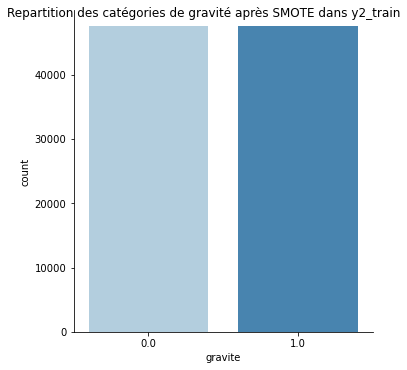

In [203]:
sns.set_palette("Blues",2)
ax=sns.catplot(x='gravite', kind="count",  data=y2_train)
ax.fig.suptitle('Repartition des catégories de gravité après SMOTE dans y2_train')

In [204]:
logit_model2=sm.Logit(y2_train,X2_train)
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.544095
         Iterations 14
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.215      
Dependent Variable: gravite          AIC:              103846.7249
Date:               2021-01-26 20:07 BIC:              104859.3828
No. Observations:   95234            Log-Likelihood:   -51816.    
Df Model:           106              LL-Null:          -66011.    
Df Residuals:       95127            LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     14.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
catv_2.0            0.0102   0.0009 11.9151 0.0000  0.0085  0.0119
catv_3.0            0.0153   0.0033  4.6797 0.0000  

In [205]:
clfr2 = logreg.fit(X2_train, y2_train)
y_pred2 = clfr2.predict(X2_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(clfr2.score(X2_test, y2_test)))
print('AUC score of logistic regression classifier on test set: {:.3f}'.format(roc_auc_score(y2_test, y_pred2)))

C:\Users\Station\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy of logistic regression classifier on test set: 0.765
AUC score of logistic regression classifier on test set: 0.615


C:\Users\Station\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [206]:
print(classification_report(y2_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85     20503
         1.0       0.51      0.33      0.40      6442

    accuracy                           0.76     26945
   macro avg       0.66      0.62      0.63     26945
weighted avg       0.74      0.76      0.75     26945



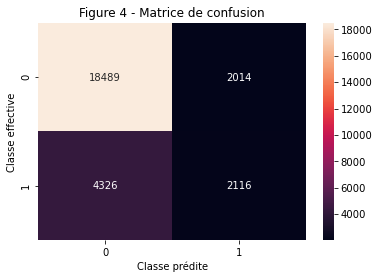

In [207]:
cm = confusion_matrix(y2_test,y_pred2)
   
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Classe prédite');ax.set_ylabel('Classe effective'); 
ax.set_title('Figure 4 - Matrice de confusion'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);



#### ce modèle est pareil que celui d'avant en terme d'accuracy et de AUC mais la matrice de confusion montre encore plus de faux negatif, ce qui n'est pas bon pour notre cas. En effet, prédire que l'accident n'est pas grave alors qu'il l'est n'est pas idéal. 

In [208]:
AME2 = result2.get_margeff(at = "overall", method = "dydx")
pval2 = pd.DataFrame(AME2.pvalues, columns = ["P-values"])
ame2 = pd.DataFrame(AME2.margeff, columns = ["Marginal_Effects"])

In [209]:
variables2 = ["Véhicules légers", "Poids lourds", "Trains/Tramways", "Heurte Véhicule en stationnement",
             "Heurte arbre", "Heurte glissière", 'Heurte Bâtiment,mur, pile de pont',
             "Heurte support de signalisation", "Heurte poteau", "Heurte mobilier urbain",
             "Heurte parapet", "Heurte ilot, refuge, borne haute", "Heurte bordure de trottoir",
             "Fossé, talus, paroie rocheuse", "Heurte autre obstacle fixe sur chaussée",
             "Heurte autre obstacle fixe sur trottoir ou accotement", "Sortie de chaussée sans obstacle",
             "Heurte véhicule", "Heurte véhicule sur rail", 
             "Heurte animal domestique", "Heurte animal sauvage", "Heurte autre obstacle mobile",
             "Entre 2 files", "En marche arrière", "A contresens", "En franchissant le terre-plein central",
             "Dans le couloir bus, dans le même sens", "Dans le couloir bus, en sens inverse",
             "En s'insérant", "En faisant demi-tour sur la chaussée", "Change de file à gauche",
             "Change de file à droite", "Se déporte à gauche", "Se déporte à droite",
             "Tourne à gauche", "Tourne à droite", "Dépasse à gauche", "Dépasse à droite",
             "Traverse la chaussée", "Stationne", "Manoeuvre d'évitement", "Ouverture de porte",
             "Arrêté", "Stationné (avec occupants)", "Utilisation professionnelle",
             "Promenade/Loisirs", "Autre",
             "Crépuscule ou aube", "Nuit sans éclairage", "Nuit avec éclairage",
             "En agglo", "Intersec X", "Intersec T", "Intersec Y",
             "Carrefour", "Giratoire", "Place", "Passage à niveau", "Autre intersection",
             "PLuie légère", "PLuie forte", "Neige/grêle", "Brouillard", "Vent fort", "Temps éblouissant",
             "Temps couvert", "Autre atmosphère", "Route Nationale", "Route Départementale",
             "Voie Communale", "Hors réseau public", "Parking publique", "Autre catégorie de route",
             "Piste cyclable", "Bande cyclable", "Voie réservée", "Autre régime de ciculation",
             "Route bidirectionelle", "Chaussées séparées", "Avec voies d'affectation variable",
             "Autre forme de route", "Route courbée à gauche", "Route courbée à droite", "Route en S",
             "Chaussée mouillée", "Flaques", "Chaussée inondée", "Chaussée enneigée", "Boue",
             "Chaussée verglacée", "Corps gras", "Autres états de la chaussée", "Souterrain/Tunnel",
             "Pont", "Bretelle d'échangeur ou de raccordement", "Voie ferrée", 
             "Carrefour aménagé", "Zone piétonne", "Zone de péage", "Dom-Tom", "Autres déclivités",
             "Pente", "Sommet de côte", "Bas de Côte", "Responsable", "Responsabilité inconnue",
             "Plus probable d'être alcoolisé"]
len(variables2)

107

In [210]:
pval2.shape

(107, 1)

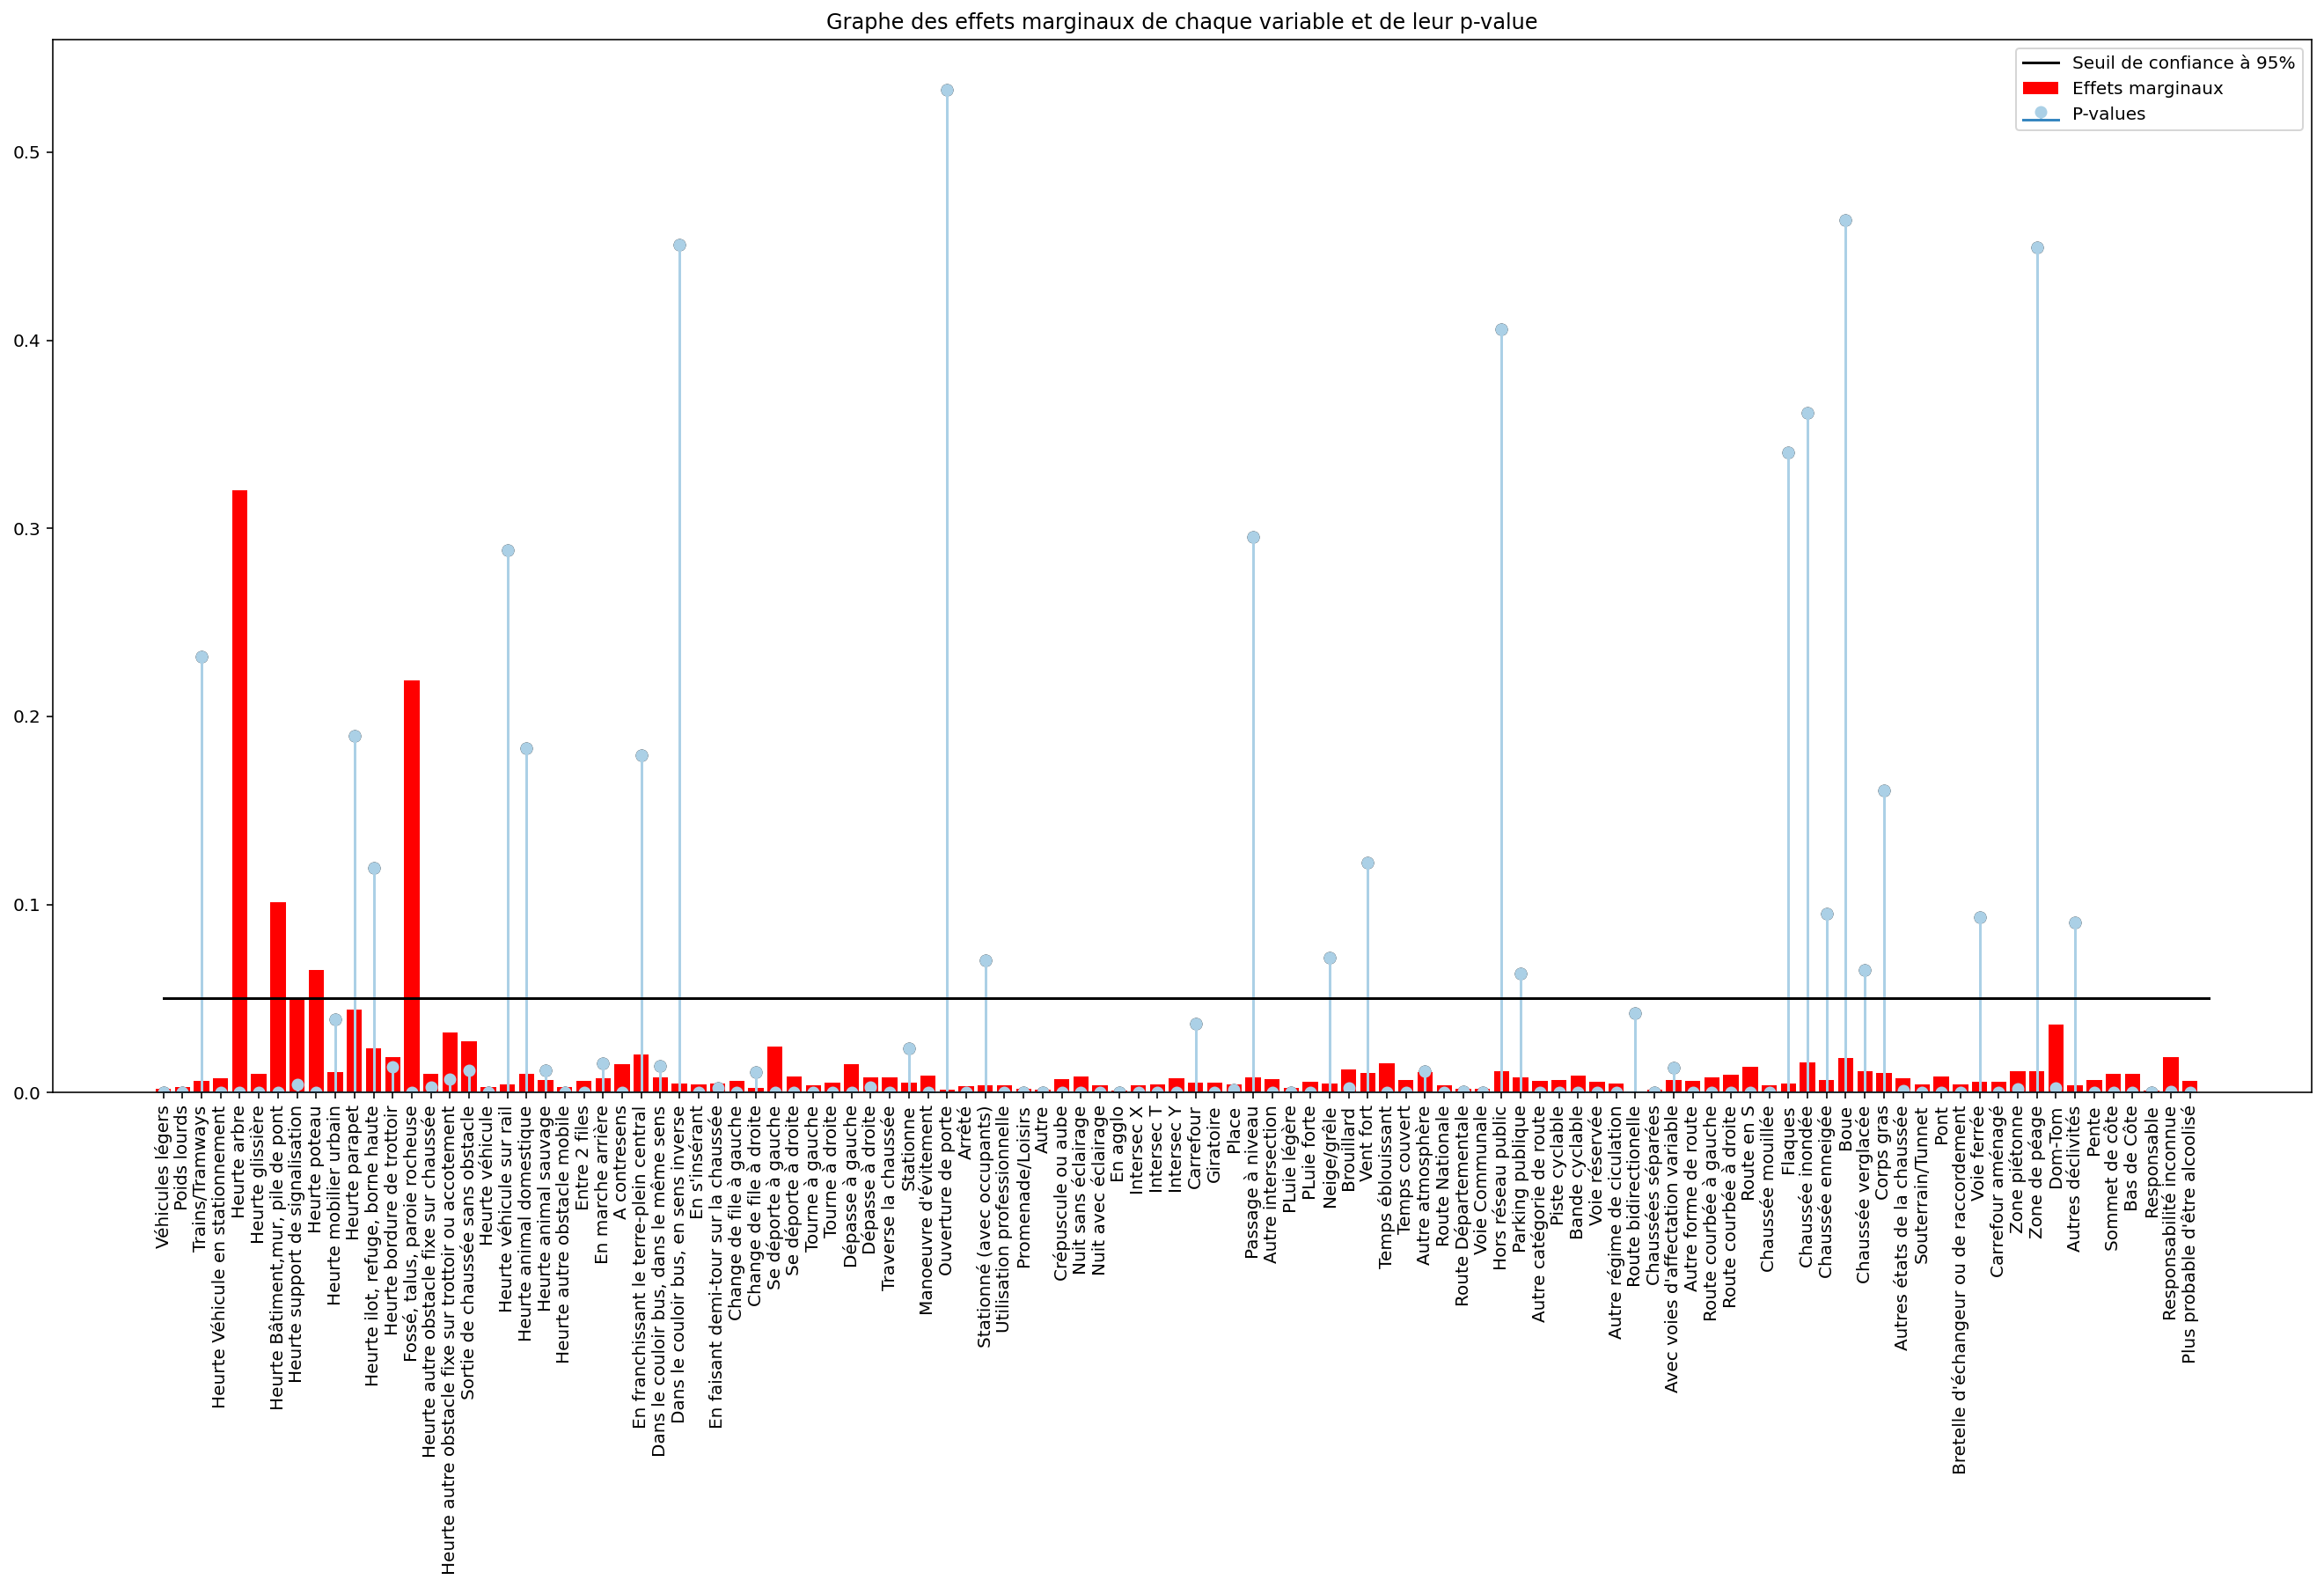

In [213]:
plt.figure(figsize = (23,11))
plt.bar(ame2.index.values, abs(ame2["Marginal_Effects"]), tick_label = variables2, color = "red", label = "Effets marginaux")
plt.scatter(pval2.index.values, abs(pval2["P-values"]), color = "black")
plt.plot([0,107], [0.05, 0.05], color = "black", label = "Seuil de confiance à 95%")
plt.xticks(rotation = 90)
plt.stem(pval2.index.values,abs(pval2["P-values"]), label = "P-values")
plt.title("Graphe des effets marginaux de chaque variable et de leur p-value")
plt.legend()
plt.savefig('margeff.png', dpi=300)
plt.show()

Les facteurs aggravant un accident de distinguent bien. Mais pour obtenir un modèle potentiellement plus pertinent, nous allons utiliser une technique de sélection de variable, la technique de l'Elastic Net.

On vérifie la multicollinéarité entre les variables explicatives : plus il y en a, plus notre modèle est biaisé.

In [ ]:
coef2 = pd.DataFrame(variables2, columns = ["Variable"])
Ame2 = pd.concat([coef2, ame2, pval2], axis = 1)

In [ ]:
pd.set_option('display.max_rows', None)
Ame2[Ame2["P-values"]>=0.05]

In [ ]:
X2_test.shape

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc2 = roc_auc_score(y2_test, clfr2.predict(X2_test))
fpr, tpr, thresholds = roc_curve(y2_test, clfr2.predict_proba(X2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Régresson logistique (aire = %0.2f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux négatifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Figure 5 - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Elastic Net

In [230]:
from sklearn import preprocessing
X1 = pd.concat([X1_train, X1_test], axis = 0)
y1 = pd.concat([y1_train, y1_test], axis = 0)
y1 = np.reshape(y1, (122179,))
X1 = preprocessing.scale(X1) 

In [231]:
from pylab import *
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
elastic = SGDClassifier(loss='log', penalty='elasticnet')
search=RandomizedSearchCV(estimator=elastic,param_distributions={'alpha':arange(0.001, 20, 1),'l1_ratio':arange(0, 1, 0.1)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5,random_state = 0)
search.fit(X1,y1.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=SGDClassifier(loss='log', penalty='elasticnet'),
                   n_jobs=1,
                   param_distributions={'alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01]),
                                        'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=0, scoring='neg_mean_squared_error')

In [232]:
print(search.best_params_)
print(abs(search.best_score_))

{'l1_ratio': 0.5, 'alpha': 0.001}
0.24778442263145117


In [233]:
EN = SGDClassifier(loss='log', penalty='elasticnet', alpha=2.001, l1_ratio=0.0)
EN.fit(X1_train, y1_train)

C:\Users\Station\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDClassifier(alpha=2.001, l1_ratio=0.0, loss='log', penalty='elasticnet')

In [234]:
y_pred = EN.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(EN.score(X1_test, y1_test)))

Accuracy of logistic regression classifier on test set: 0.76


This is exactly the same accuracy ...

In [235]:
coef_dict_baseline = []
for coef, feat in zip(EN.coef_,X1_train.columns):
    coef_dict_baseline.append(coef)
coef_dict_baseline = np.reshape(coef_dict_baseline, (106,1))
coef_dict_baseline

array([[ 0.01912672],
       [ 0.01135281],
       [ 0.00202483],
       [ 0.01410271],
       [ 0.01312193],
       [ 0.01574207],
       [ 0.01307549],
       [ 0.00730625],
       [ 0.01377877],
       [ 0.00539873],
       [ 0.00418456],
       [ 0.00606893],
       [ 0.01028484],
       [ 0.01509188],
       [ 0.00927681],
       [ 0.01095641],
       [ 0.00922331],
       [ 0.00280793],
       [ 0.00350664],
       [ 0.00425289],
       [ 0.00622706],
       [ 0.01998379],
       [ 0.00965101],
       [ 0.00774762],
       [ 0.01507973],
       [ 0.00342493],
       [ 0.00645833],
       [ 0.00082824],
       [ 0.01140955],
       [ 0.00767362],
       [ 0.01048288],
       [ 0.00609485],
       [ 0.02220129],
       [ 0.01804694],
       [ 0.01506534],
       [ 0.01341451],
       [ 0.0198688 ],
       [ 0.00820823],
       [ 0.01543913],
       [ 0.00669008],
       [ 0.01639266],
       [-0.0001202 ],
       [ 0.00838263],
       [ 0.00367148],
       [ 0.01692218],
       [ 0

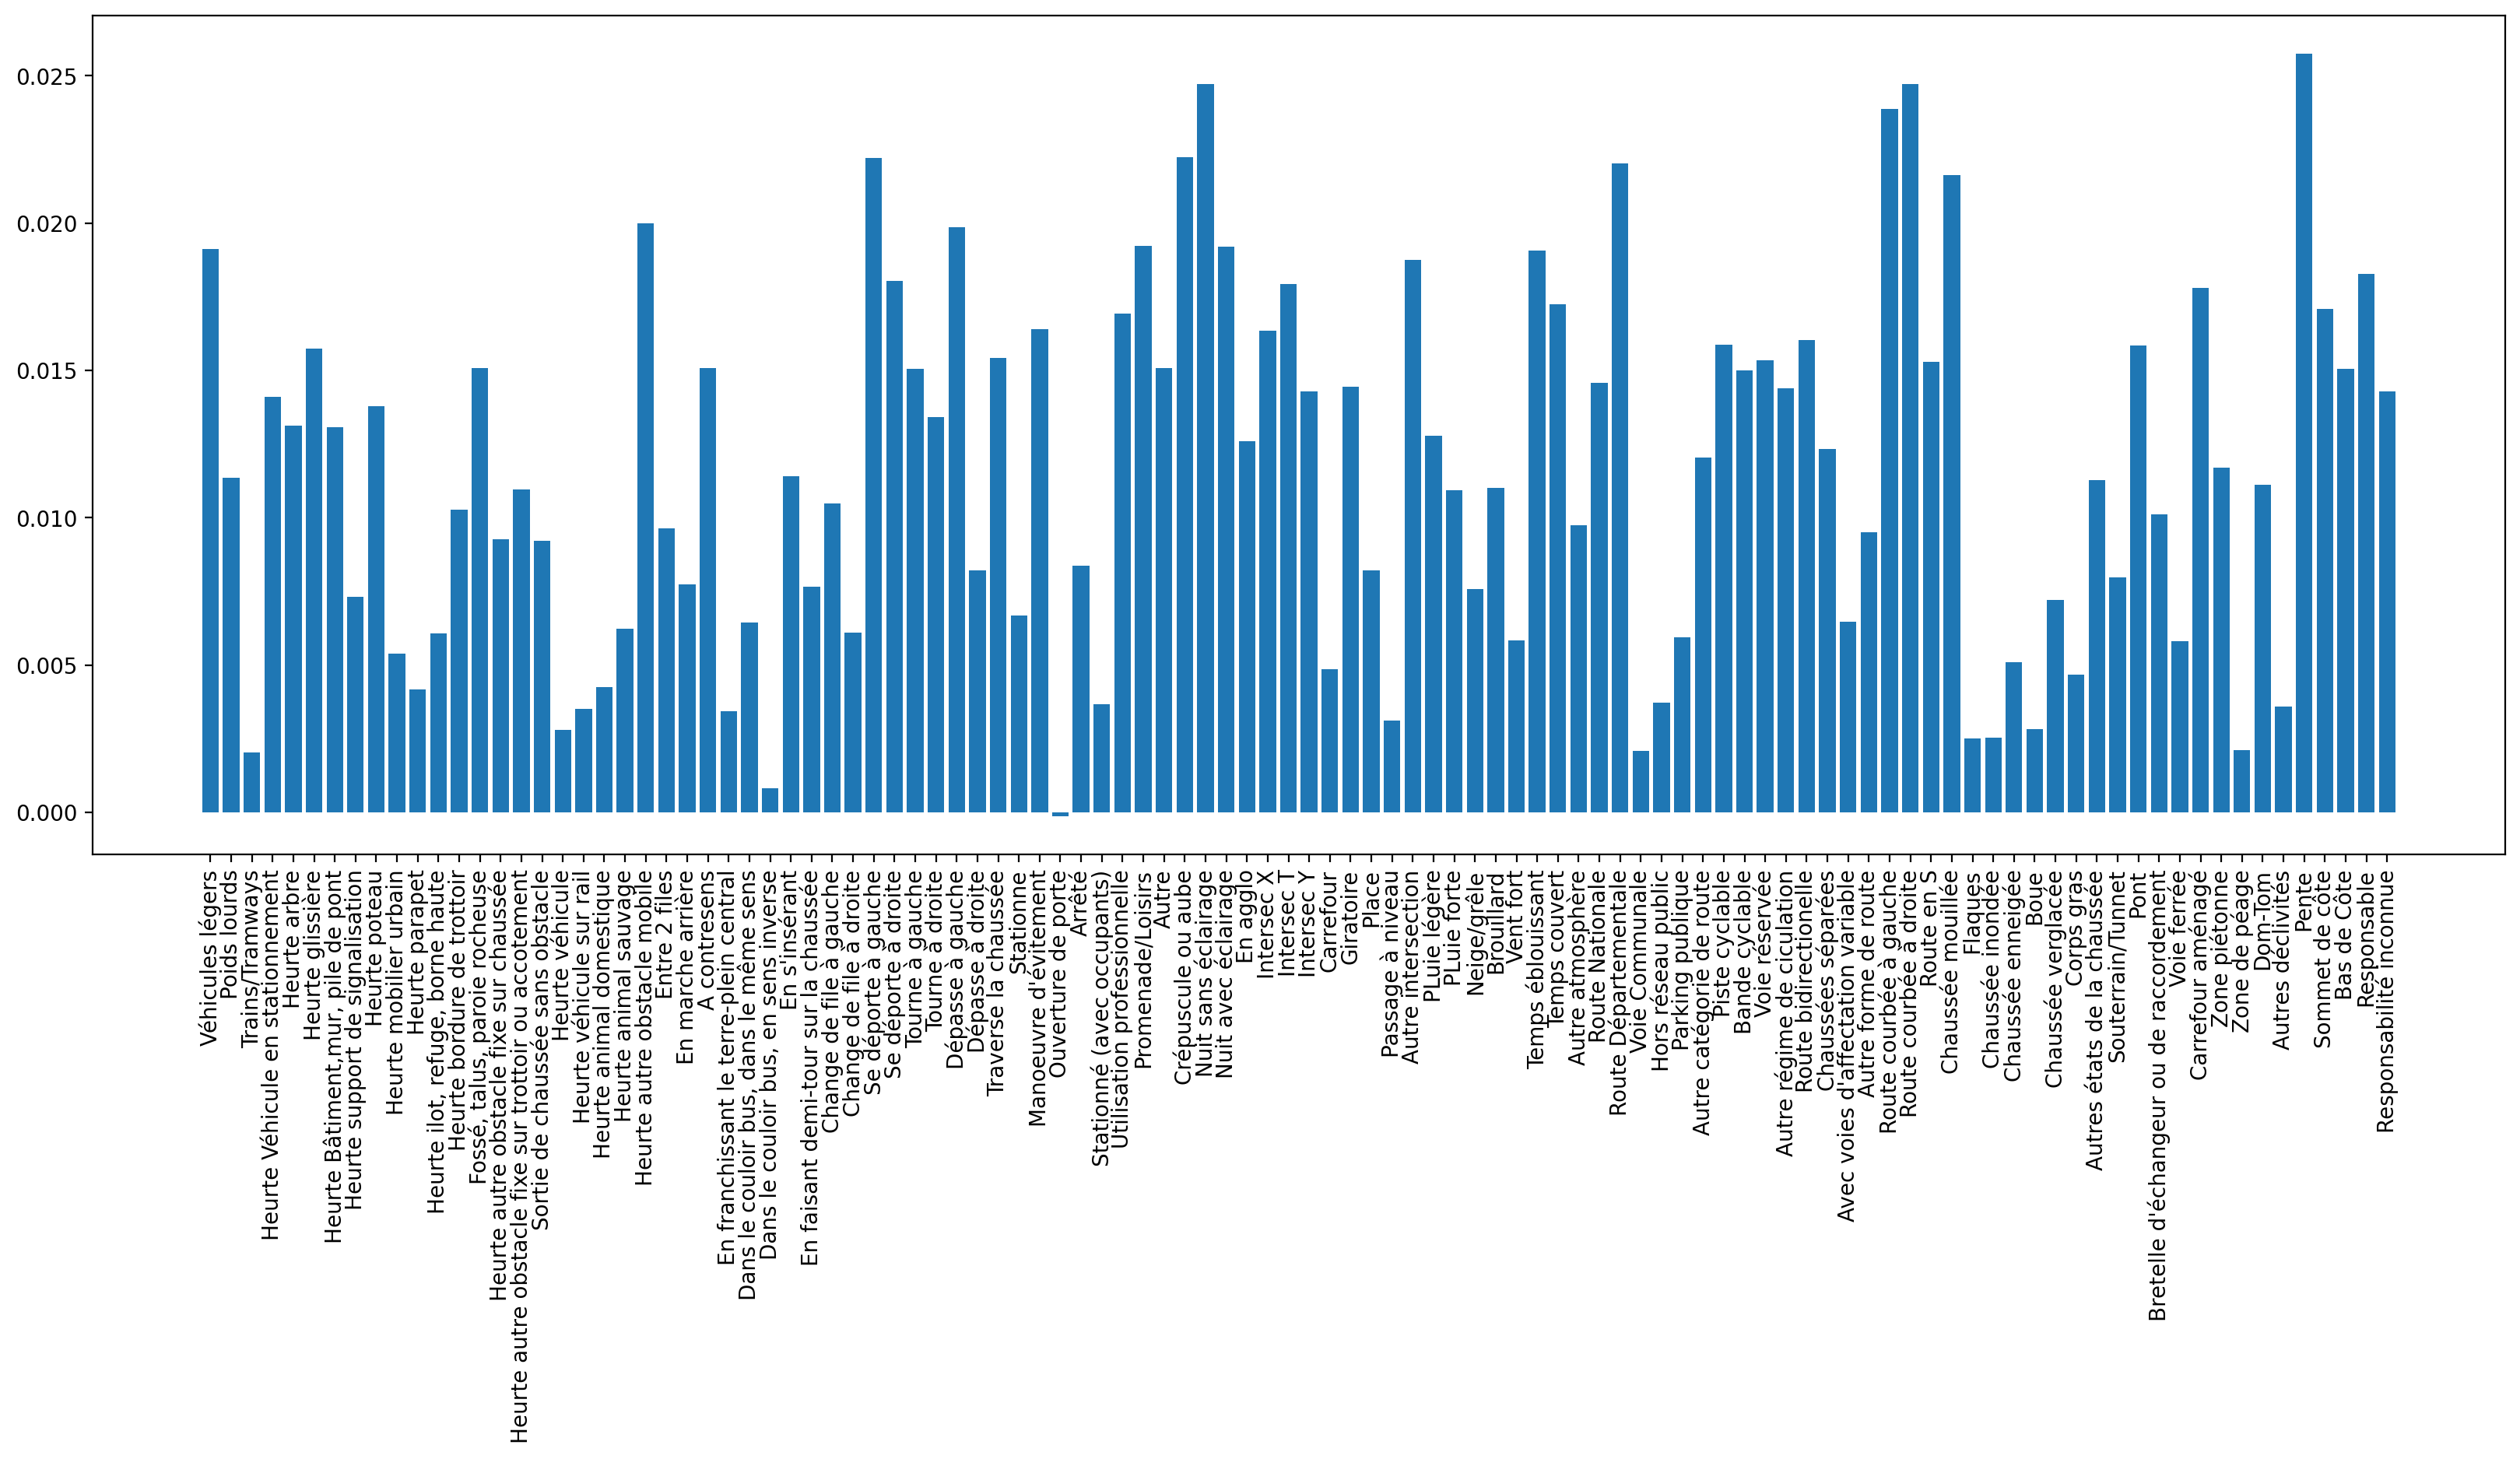

In [236]:
#là j'affiche les coefficient estimés par le modèle
coefelan = pd.DataFrame(coef_dict_baseline, columns = ["Coef"])
col = X1_train.columns
plt.figure(figsize = (20,7))
plt.bar(coefelan.index.values, coefelan["Coef"], tick_label = variables)
plt.xticks( rotation = 90)
plt.show()

In [237]:
var = np.reshape(variables, (106,1))
var = pd.DataFrame(var, columns = ["Variable"])
coefelan["Variable"] = var["Variable"]
for i in range(106):
    if coefelan.iloc[i][0] == 0:
        print(coefelan.iloc[i][1])

C'est normal car l'elastic net n'a réduit à 0 aucun coefficient, nous avons donc quasiment le même modèle. On pourrait essayer avec lasso, mais il faut faire attention car cette technique marche mal lorsque nous avons beaucoup de collinearité entre les variables.

Avant tout, je vais comparer nos deux précédents modèles en calculant la MSE moyenne issue d'un 5 fold cross validation (peut-être que cela les départagera).

1) 5-fold cross-validation for elastic net

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

scoreen = cross_val_score(EN, X1, y1, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("The absolute MSE of the best elastic net model is:", mean(absolute(scoreen)))

2) 5-fold cross-validation for basic logistic regression

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

logit_model1=LogisticRegression()
scorelog = cross_val_predict(logit_model1, X1, y1, cv=5, max_iter = 10000, dual = True)

print("The absolute MSE of the logistic regression model is:", mean(absolute(scorelog)))

The basic logistic regression seems to be more accurate because the 5-fold cross-validation's MSE is lower.

In [ ]:
logit_model2=LogisticRegression(penalty='l1', solver='liblinear')
parameters = {"C":arange(0.001,20,1)}

In [ ]:
logit_model2 = RandomizedSearchCV(logit_model2, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)
logit_model2.fit(X1, y1.values.ravel())

In [ ]:
print(logit_model2.best_params_)

### Logistic regression with gradient descent

In [223]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

### SGDC sont des modeles linéaires (tupe SVM ou logistic regression qui utilisent le gradient descebt (SGD)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [224]:

# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(loss='log', penalty='l2', learning_rate='optimal')) #'log' pour faire logistic regression
clf.fit(X1_train, y1_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

C:\Users\Station\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [225]:
pred_gd = clf.predict(X1_test)

In [226]:
from sklearn.metrics import roc_auc_score, accuracy_score

print("the AUC is :", roc_auc_score(y1_test,pred_gd))
print("the accuracy is :", accuracy_score(y1_test,pred_gd))

the AUC is : 0.6106077335090768
the accuracy is : 0.7520875858229727


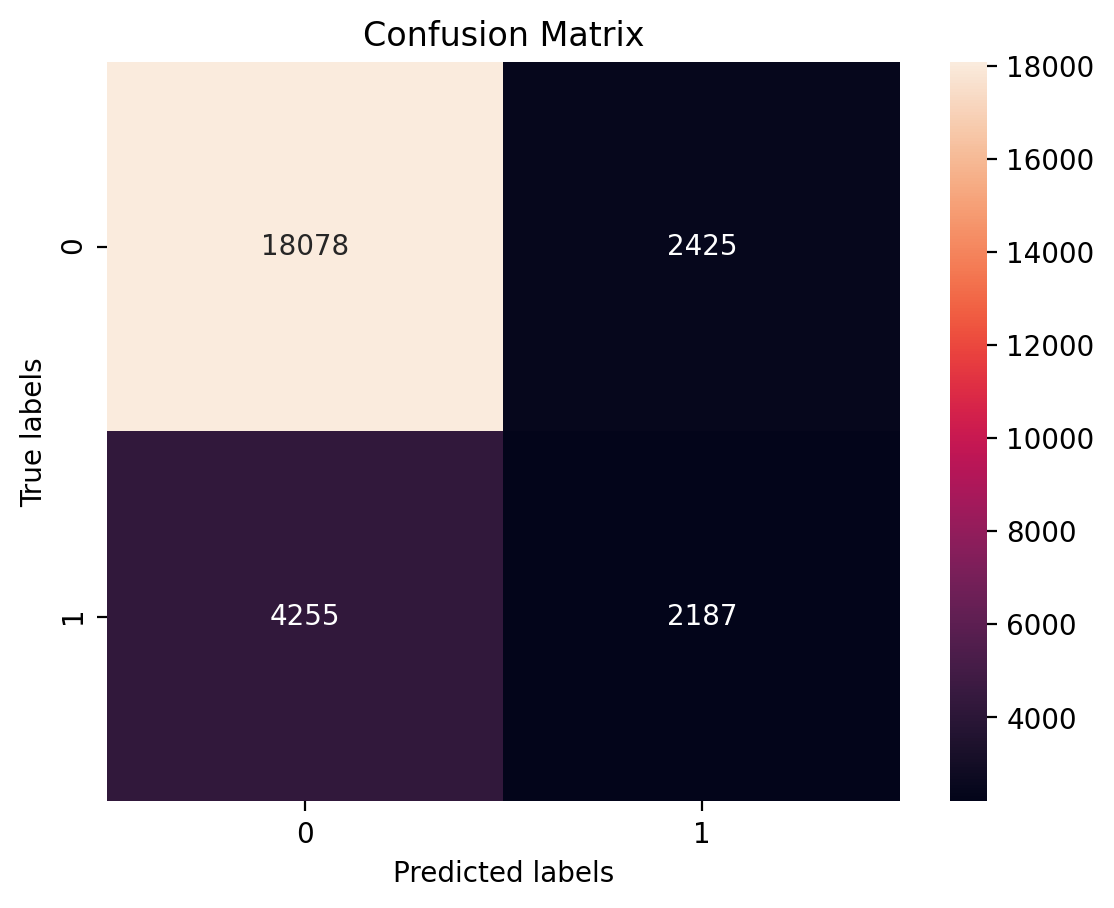

In [227]:
cm_gd=confusion_matrix(y1_test,pred_gd)
   
ax= plt.subplot()
sns.heatmap(cm_gd, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

In [228]:
print(classification_report(y2_test, pred_gd))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84     20503
         1.0       0.47      0.34      0.40      6442

    accuracy                           0.75     26945
   macro avg       0.64      0.61      0.62     26945
weighted avg       0.73      0.75      0.74     26945



# 4) Machine learning methode : Random Forest

In [214]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [215]:
rf_classifier= RandomForestClassifier(random_state=0)
rf_classifier.fit(X2_train, y2_train)
pred_rf = rf_classifier.predict(X2_test)  

<ipython-input-215-f454853e629c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X2_train, y2_train)


In [229]:
print("the AUC is :", roc_auc_score(y2_test, pred_rf))
print("the accuracy is :", accuracy_score(y2_test, pred_rf))

the AUC is : 0.6795262869051367
the accuracy is : 0.7673779922063463


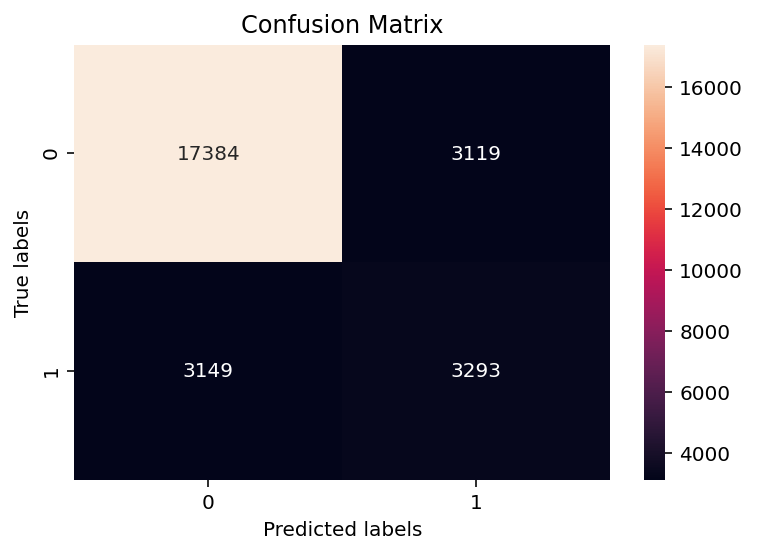

In [217]:
cm=confusion_matrix(y2_test, pred_rf)
   
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

In [218]:
from sklearn.metrics import classification_report

In [219]:
print(classification_report(y2_test, pred_rf))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85     20503
         1.0       0.51      0.51      0.51      6442

    accuracy                           0.77     26945
   macro avg       0.68      0.68      0.68     26945
weighted avg       0.77      0.77      0.77     26945



### 10 meilleures variables explicatives 

In [220]:
variables2 = ["Véhicules légers", "Poids lourds", "Trains/Tramways", "Heurte Véhicule en stationnement",
             "Heurte arbre", "Heurte glissière", 'Heurte Bâtiment,mur, pile de pont',
             "Heurte support de signalisation", "Heurte poteau", "Heurte mobilier urbain",
             "Heurte parapet", "Heurte ilot, refuge, borne haute", "Heurte bordure de trottoir",
             "Fossé, talus, paroie rocheuse", "Heurte autre obstacle fixe sur chaussée",
             "Heurte autre obstacle fixe sur trottoir ou accotement", "Sortie de chaussée sans obstacle",
             "Heurte véhicule", "Heurte véhicule sur rail", 
             "Heurte animal domestique", "Heurte animal sauvage", "Heurte autre obstacle mobile",
             "Entre 2 files", "En marche arrière", "A contresens", "En franchissant le terre-plein central",
             "Dans le couloir bus, dans le même sens", "Dans le couloir bus, en sens inverse",
             "En s'insérant", "En faisant demi-tour sur la chaussée", "Change de file à gauche",
             "Change de file à droite", "Se déporte à gauche", "Se déporte à droite",
             "Tourne à gauche", "Tourne à droite", "Dépasse à gauche", "Dépasse à droite",
             "Traverse la chaussée", "Stationne", "Manoeuvre d'évitement", "Ouverture de porte",
             "Arrêté", "Stationné (avec occupants)", "Utilisation professionnelle",
             "Promenade/Loisirs", "Autre",
             "Crépuscule ou aube", "Nuit sans éclairage", "Nuit avec éclairage",
             "En agglo", "Intersec X", "Intersec T", "Intersec Y",
             "Carrefour", "Giratoire", "Place", "Passage à niveau", "Autre intersection",
             "PLuie légère", "PLuie forte", "Neige/grêle", "Brouillard", "Vent fort", "Temps éblouissant",
             "Temps couvert", "Autre atmosphère", "Route Nationale", "Route Départementale",
             "Voie Communale", "Hors réseau public", "Parking publique", "Autre catégorie de route",
             "Piste cyclable", "Bande cyclable", "Voie réservée", "Autre régime de ciculation",
             "Route bidirectionelle", "Chaussées séparées", "Avec voies d'affectation variable",
             "Autre forme de route", "Route courbée à gauche", "Route courbée à droite", "Route en S",
             "Chaussée mouillée", "Flaques", "Chaussée inondée", "Chaussée enneigée", "Boue",
             "Chaussée verglacée", "Corps gras", "Autres états de la chaussée", "Souterrain/Tunnet",
             "Pont", "Bretelle d'échangeur ou de raccordement", "Voie ferrée", 
             "Carrefour aménagé", "Zone piétonne", "Zone de péage", "Dom-Tom", "Autres déclivités",
             "Pente", "Sommet de côte", "Bas de Côte", "Responsable", "Responsabilité inconnue",
             "Plus probable d'être alcoolisé"]
len(variables2)

107

In [221]:
#Get the importance of each variable 
importances = list(rf_classifier.feature_importances_)
features_name = variables2

#put the importance and the name in a list using zip
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(features_name, importances)]

#sort the values 
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

#keep the 10most importany
feature_importances_10 = feature_importances[0:10]

#print the top 10 features

[print('Variable explicative: {:20} Importance:      {}'.format(*pair)) for pair in feature_importances_10];

Variable explicative: Véhicules légers     Importance:      0.0898
Variable explicative: Heurte véhicule      Importance:      0.0767
Variable explicative: En agglo             Importance:      0.0399
Variable explicative: Route bidirectionelle Importance:      0.031
Variable explicative: Pente                Importance:      0.031
Variable explicative: Route Départementale Importance:      0.026
Variable explicative: Heurte autre obstacle mobile Importance:      0.0259
Variable explicative: Plus probable d'être alcoolisé Importance:      0.0256
Variable explicative: Chaussée mouillée    Importance:      0.0252
Variable explicative: Responsable          Importance:      0.0232


Text(0.5, 1.0, 'Les 10 variables explicatives les plus importantes de la forêt aléaoire')

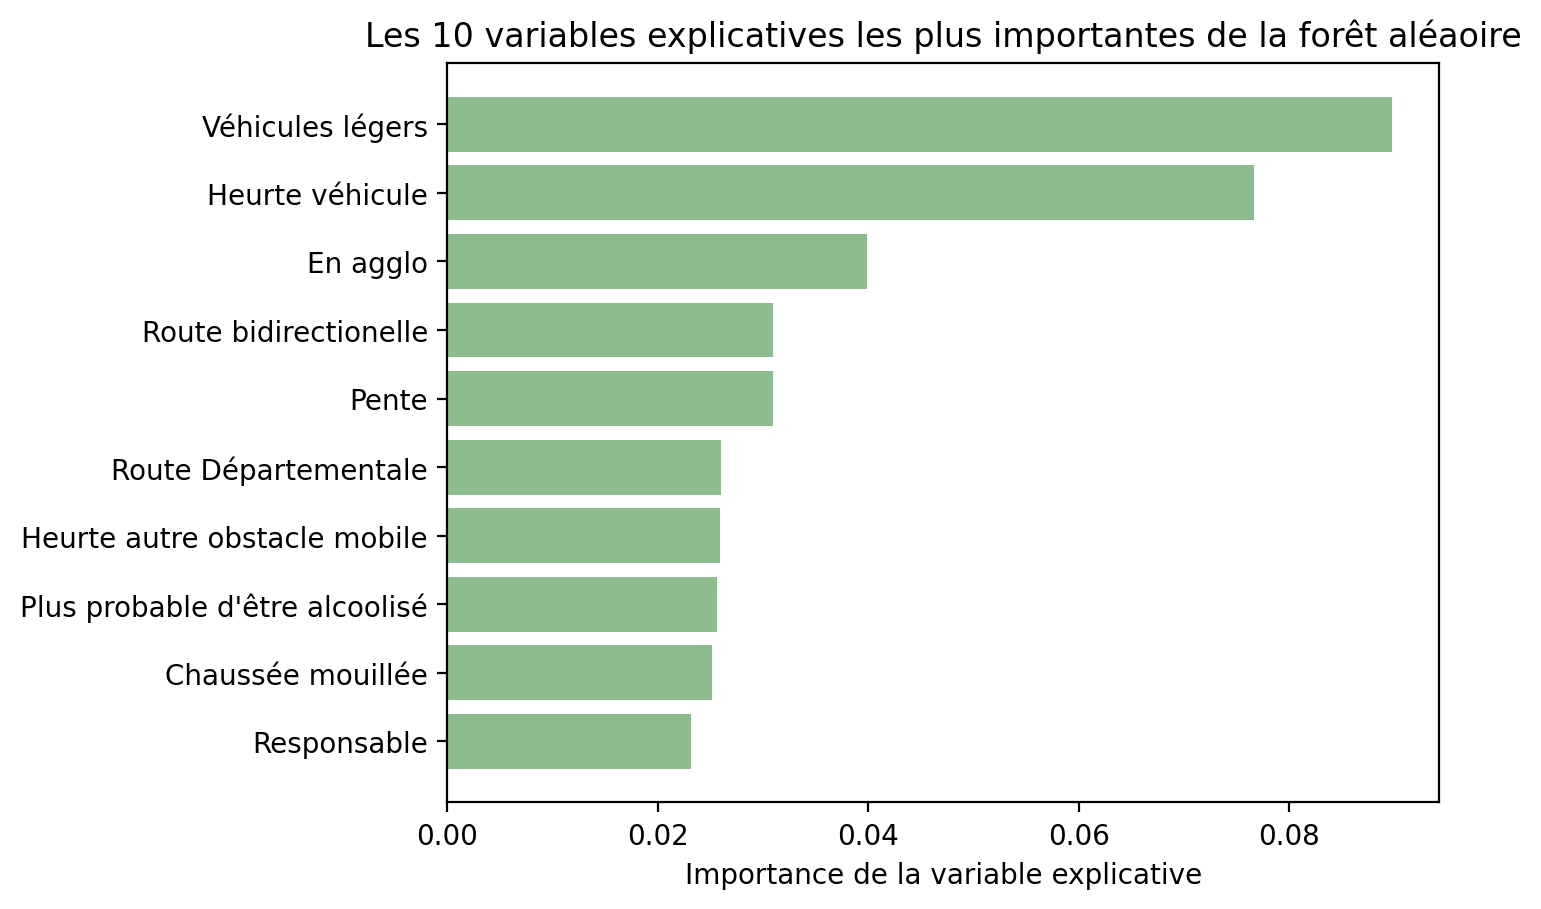

In [222]:
feature, importance = zip(*feature_importances_10)
y_pos = np.arange(len(feature)) 

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, importance, align='center', color = 'darkseagreen')
ax.set_yticks(y_pos)
ax.set_yticklabels(feature)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance de la variable explicative')
ax.set_title('Les 10 variables explicatives les plus importantes de la forêt aléaoire')